# House Price Prediction  -- Capstone Project -- Note-1
![House Price Prediction](House_pic_source_pexels-photo-186077.jpeg)

# INTRODUCTION

## Problem Statement
As a house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, if we want to sell a house and we don't know the price which we can take, as it can't be too low or too high. To find house price we usually try to find similar properties in our neighbourhood and based on collected data we trying to assess our house price.

### Problem Definition
While looking for a new house we rely on many factors that decide our dream house how it would be and where it would be. As a buyer our councern is the price, quality, locatiom, reliability, space, sufficient room for all family members, and many other such factors. 
When a real esate business sells or buys a house, they also face this kind of issue as they don't not sure just by looking at the property that how much price they should offer. Offering too low or high as property price might create a financial blunder for both the parties. 
Hence, if we can anyhow create an analysis system using available data of the properties in the area, that can predict the reasonable price would help both the parties to make a right deal. Hence, we need to evaluate that how these variables influence the house prices.

### Objective
Present objective is do a exploratory data analysis to get insights about the data, to see trends and pattern present in the data. 

### Business Reason
This can create an oppurtunity to create a win win situation between the three points of triangle which holds the house buyer who wish to buy their dream house at a suitable price without loosing their precious money, the property dealer/owner who wants to offer the best price without making any loss and third is us who wish to give them both the best service using the power of data analytics at a small cost of our effort to evaluate the right price. 

# Initial data loading

#### Import Initial Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import warnings
warnings.filterwarnings("ignore")

#### Read Dataset

In [2]:
#read dataset
dataset_raw = pd.read_excel("innercity.xlsx")

In [3]:
#display head of the complete dataset (with all columns)
pd.set_option("display.max_columns", None)
dataset_raw.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight condition  quality  ceil_measure  basement  \
0       9440.0    1     0    0.0         3      8.0        1800.0    1250.0   
1       3101.0    1     0    0.0         4      6.0         670.0       0.0   
2       2415.0    2     1    4.0         3      8.0        3040.0       0.0   
3       3721.0    2     0    0.0         3      8.0        1740.0       0.0   
4       4590.0    1     0    0.0         3      7.0        1120.0       0.0   

  yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
0     1966             0    98034  47.7228 -122.183            2020.0   
1     1948             0    98118  47.5546 -122.274            1660.0   
2     1966             0    98118  47.5188 -122.256            2620.0   
3     2009             0    98002  47.3363 -122.213            2030.0   
4     1924             0    98118  47.5663 -122.285            1120.0   

   lot_measure15  furnished total_area  
0         8660.0        0.0      12490  
1         4100.0        0.0       3771  
2         2433.0        0.0       5455  
3         3794.0        0.0       5461  
4         5100.0        0.0       5710

In [4]:
print('These are the variable columns in the dataset: \n\n', dataset_raw.columns , '\n\n The data dictionary is given below.')

These are the variable columns in the dataset: 

 Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object') 

 The data dictionary is given below.


#### Data Dictionary

1. cid: a notation for a house
2. dayhours: Date house was sold
3. price: Price is prediction target
4. room_bed: Number of Bedrooms/House
5. room_bath: Number of bathrooms/bedrooms
6. living_measure: square footage of the home
7. lot_measure: square footage of the lot
8. ceil: Total floors (levels) in house
9. coast: House which has a view to a waterfront
10. sight: Has been viewed
11. condition: How good the condition is (Overall)
12. quality: grade given to the housing unit, based on grading system
13. ceil_measure: square footage of house apart from basement
14. basement_measure: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip code of the area
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
21. lot_measure15: lotSize area in 2015(implies-- some renovations)
22. furnished: Based on the quality of room
23. total_area: Measure of both living and lot

In [5]:
# number of columns and rows
print('The number of rows (observations) is',dataset_raw.shape[0],'\n''The number of columns (variables) is',dataset_raw.shape[1])

The number of rows (observations) is 21613 
The number of columns (variables) is 23


In [6]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

Note: 

1. There are 23 variables. There are 12 float datatypes, 4 integer datatypes and 7 object datatypes.
2. There are few time data columns like dayhours (day at which house was sold), 
3. yr_built (year on which house was built), and yr_renovated (year on which house was renovated). These variables are not in time format, which we have to change, "if required".
4. Object datatypes can also be changed to float for seeing their correlation with other variables. 

In [7]:
## statistical summary of the raw dataset
dataset_raw.describe().round(2).T

count          mean           std         min  \
cid               21613.0  4.580302e+09  2.876566e+09  1000102.00   
price             21613.0  5.401822e+05  3.673622e+05    75000.00   
room_bed          21505.0  3.370000e+00  9.300000e-01        0.00   
room_bath         21505.0  2.120000e+00  7.700000e-01        0.00   
living_measure    21596.0  2.079860e+03  9.185000e+02      290.00   
lot_measure       21571.0  1.510458e+04  4.142362e+04      520.00   
sight             21556.0  2.300000e-01  7.700000e-01        0.00   
quality           21612.0  7.660000e+00  1.180000e+00        1.00   
ceil_measure      21612.0  1.788370e+03  8.281000e+02      290.00   
basement          21612.0  2.915200e+02  4.425800e+02        0.00   
yr_renovated      21613.0  8.440000e+01  4.016800e+02        0.00   
zipcode           21613.0  9.807794e+04  5.351000e+01    98001.00   
lat               21613.0  4.756000e+01  1.400000e-01       47.16   
living_measure15  21447.0  1.987070e+03  6.855200e+02      399.00   
lot_measure15     21584.0  1.276654e+04  2.728699e+04      651.00   
furnished         21584.0  2.000000e-01  4.000000e-01        0.00   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.429250e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068450e+04  1.651359e+06  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747000e+01  4.757000e+01  4.768000e+01  4.778000e+01  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008700e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00

### Dealing with location data

#### Using zipcodes to track city, county, state and population of the area.
We have used knime to join the US zipcodes with the present zipcodes in the dataset.

![](knime_workflow.jpg)

The new updated datset was renamed as "innercity_mod.xlsx".
We will import that dataset and use the features of it like City name, county name, population and population density, for a better perspective of house price based on location.

In [8]:
## assigning to a new data before data cleaning
dataset = pd.read_excel("innercity_mod.xlsx")

In [9]:
dataset.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight condition  quality  ceil_measure  basement  \
0       9440.0    1     0    0.0         3      8.0        1800.0    1250.0   
1       3101.0    1     0    0.0         4      6.0         670.0       0.0   
2       2415.0    2     1    4.0         3      8.0        3040.0       0.0   
3       3721.0    2     0    0.0         3      8.0        1740.0       0.0   
4       4590.0    1     0    0.0         3      7.0        1120.0       0.0   

  yr_built  yr_renovated  zipcode  living_measure15  lot_measure15  furnished  \
0     1966             0    98034            2020.0         8660.0        0.0   
1     1948             0    98118            1660.0         4100.0        0.0   
2     1966             0    98118            2620.0         2433.0        0.0   
3     2009             0    98002            2030.0         3794.0        0.0   
4     1924             0    98118            1120.0         5100.0        0.0   

  total_area  latitude  longitude      city  state_name  population  density  \
0      12490  47.71577 -122.21580  Kirkland  Washington       43471   1853.0   
1       3771  47.54245 -122.26880   Seattle  Washington       49181   3037.8   
2       5455  47.54245 -122.26880   Seattle  Washington       49181   3037.8   
3       5461  47.30836 -122.21638    Auburn  Washington       33468   1797.1   
4       5710  47.54245 -122.26880   Seattle  Washington       49181   3037.8   

  county_name  
0        King  
1        King  
2        King  
3        King  
4        King

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

# Basic Data Cleaning

#### Convert datatypes for ease

In [11]:
## converting dayhours into timestamp

dataset['dayhours'] = pd.to_datetime(dataset['dayhours'], format='%Y-%m-%d')

In [12]:
## Changing datatype into float with error coarse to change unwanted strings into NaN values

change_datatype_cols = dataset[['ceil','coast','condition','yr_built','total_area']]

for i in change_datatype_cols:
    dataset[i] = pd.to_numeric(dataset[i],errors='coerce')

In [13]:
#zipcode is changed to object datatype
dataset = dataset.astype({'zipcode':'object'})

In [14]:
## Converting other date variables from object/int datatype to date datatype
    # dataset['yr_built'] = pd.to_datetime(dataset['yr_built'], errors='coerce', format='%Y')
    # dataset['yr_renovated'] = pd.to_datetime(dataset['yr_renovated'])

In [15]:
## Remove unwanted string characters
   #dataset = dataset.replace("$","")

In [16]:
## checking datatypes after conversion
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21613 non-null  int64         
 1   dayhours          21613 non-null  datetime64[ns]
 2   price             21613 non-null  int64         
 3   room_bed          21505 non-null  float64       
 4   room_bath         21505 non-null  float64       
 5   living_measure    21596 non-null  float64       
 6   lot_measure       21571 non-null  float64       
 7   ceil              21541 non-null  float64       
 8   coast             21582 non-null  float64       
 9   sight             21556 non-null  float64       
 10  condition         21528 non-null  float64       
 11  quality           21612 non-null  float64       
 12  ceil_measure      21612 non-null  float64       
 13  basement          21612 non-null  float64       
 14  yr_built          2159

#### Renaming few columns for ease to understand

we are renaming the confusing column names for an ease of understanding.

In [17]:
## renaming all the confusing column names
dataset.rename(columns={'cid':'house_id','dayhours':'date','room_bed':'bedroom','room_bath':'bathroom','ceil':'total_floors', 'coast':'seaface', 'sight':'sight_viewed', 'quality':'quality_grade','living_measure':'living_area','lot_measure':'lot_area','ceil_measure':'floor_area','basement':'basement_area','lat':'latitude', 'long':'longitude', 'living_measure15':'living_area_2015', 'lot_measure15':'lot_area_2015'}, inplace=True)

In [18]:
## rechecking head after renaming the columns
dataset.head()

house_id       date   price  bedroom  bathroom  living_area  lot_area  \
0  3876100940 2015-04-27  600000      4.0      1.75       3050.0    9440.0   
1  3145600250 2015-03-17  190000      2.0      1.00        670.0    3101.0   
2  7129303070 2014-08-20  735000      4.0      2.75       3040.0    2415.0   
3  7338220280 2014-10-10  257000      3.0      2.50       1740.0    3721.0   
4  7950300670 2015-02-18  450000      2.0      1.00       1120.0    4590.0   

   total_floors  seaface  sight_viewed  condition  quality_grade  floor_area  \
0           1.0      0.0           0.0        3.0            8.0      1800.0   
1           1.0      0.0           0.0        4.0            6.0       670.0   
2           2.0      1.0           4.0        3.0            8.0      3040.0   
3           2.0      0.0           0.0        3.0            8.0      1740.0   
4           1.0      0.0           0.0        3.0            7.0      1120.0   

   basement_area  yr_built  yr_renovated zipcode  living_area_2015  \
0         1250.0    1966.0             0   98034            2020.0   
1            0.0    1948.0             0   98118            1660.0   
2            0.0    1966.0             0   98118            2620.0   
3            0.0    2009.0             0   98002            2030.0   
4            0.0    1924.0             0   98118            1120.0   

   lot_area_2015  furnished  total_area  latitude  longitude      city  \
0         8660.0        0.0     12490.0  47.71577 -122.21580  Kirkland   
1         4100.0        0.0      3771.0  47.54245 -122.26880   Seattle   
2         2433.0        0.0      5455.0  47.54245 -122.26880   Seattle   
3         3794.0        0.0      5461.0  47.30836 -122.21638    Auburn   
4         5100.0        0.0      5710.0  47.54245 -122.26880   Seattle   

   state_name  population  density county_name  
0  Washington       43471   1853.0        King  
1  Washington       49181   3037.8        King  
2  Washington       49181   3037.8        King  
3  Washington       33468   1797.1        King  
4  Washington       49181   3037.8        King

In [19]:
## sorting dataset based on date
dataset = dataset.sort_values('date')

In [20]:
## resorted datset
dataset.reset_index(inplace=True)
dataset.drop(['index'], axis=1, inplace=True)

In [21]:
dataset.head()

house_id       date   price  bedroom  bathroom  living_area  lot_area  \
0  2202500290 2014-05-02  435000      4.0      1.00       1450.0    8800.0   
1  2011000010 2014-05-02  257950      3.0      1.75       1370.0    5858.0   
2   943100683 2014-05-02  335000      3.0      2.25       1580.0   16215.0   
3  8673400086 2014-05-02  445700      3.0      2.50       1270.0    1180.0   
4  1737320120 2014-05-02  470000      5.0      2.50       2210.0    9655.0   

   total_floors  seaface  sight_viewed  condition  quality_grade  floor_area  \
0           1.0      0.0           0.0        4.0            7.0      1450.0   
1           1.0      0.0           0.0        3.0            7.0      1370.0   
2           1.0      0.0           0.0        4.0            7.0      1580.0   
3           3.0      0.0           0.0        3.0            8.0      1270.0   
4           1.0      0.0           0.0        3.0            8.0      1460.0   

   basement_area  yr_built  yr_renovated zipcode  living_area_2015  \
0            0.0    1954.0             0   98006            1260.0   
1            0.0    1987.0             0   98198            1400.0   
2            0.0    1978.0             0   98024            1450.0   
3            0.0    2001.0             0   98107            1320.0   
4          750.0    1976.0             0   98011            2080.0   

   lot_area_2015  furnished  total_area  latitude  longitude       city  \
0         8942.0        0.0     10250.0  47.55748 -122.15081   Bellevue   
1         7500.0        0.0      7228.0  47.39460 -122.31122    Seattle   
2        16215.0        0.0     17795.0  47.57493 -121.90112  Fall City   
3         1180.0        0.0      2450.0  47.66762 -122.37810    Seattle   
4         8633.0        0.0     11865.0  47.75338 -122.20189    Bothell   

   state_name  population  density county_name  
0  Washington       37871   1365.3        King  
1  Washington       37966   1901.3        King  
2  Washington        6890    111.2        King  
3  Washington       27534   4838.8        King  
4  Washington       33830   1592.6        King

In [22]:
## checking duplicate rows
dataset.duplicated().sum()

0

In [23]:
## checking if there are duplicate houses that sold more than one times
dataset.duplicated(subset=['house_id']).sum()

177

Note: This shows that few of the house are sold multiples times.

In [24]:
## house sold multiple times
id_count = dataset['house_id'].value_counts()
id_count[id_count>1]

795000620     3
643300040     2
302000375     2
3598600049    2
7167000040    2
             ..
6632900574    2
641900050     2
4139420590    2
4031000520    2
3185600040    2
Name: house_id, Length: 176, dtype: int64

#### Adding a new column 'house_sold'
Note: new dataset showing house resold no of times
1. 1 mean not resold or sold the very first time. House sold 1 time 
2. 2 means resold one more time after the first purchase. House sold 2 times
3. 3 shows resold two times after the first purchase. House sold 3 times

The reason behind doing this is because the price might increase or decrease if a property is resold multiple times.

In [25]:
## lets generate a new column that counts in order that how many times a house was sold
dataset['house_sold'] = dataset.groupby('house_id').cumcount() +1

In [26]:
#dataset.drop(['house_resold'], axis=1, inplace=True)

In [27]:
## new dataset showing house resold no of times
dataset.head()

house_id       date   price  bedroom  bathroom  living_area  lot_area  \
0  2202500290 2014-05-02  435000      4.0      1.00       1450.0    8800.0   
1  2011000010 2014-05-02  257950      3.0      1.75       1370.0    5858.0   
2   943100683 2014-05-02  335000      3.0      2.25       1580.0   16215.0   
3  8673400086 2014-05-02  445700      3.0      2.50       1270.0    1180.0   
4  1737320120 2014-05-02  470000      5.0      2.50       2210.0    9655.0   

   total_floors  seaface  sight_viewed  condition  quality_grade  floor_area  \
0           1.0      0.0           0.0        4.0            7.0      1450.0   
1           1.0      0.0           0.0        3.0            7.0      1370.0   
2           1.0      0.0           0.0        4.0            7.0      1580.0   
3           3.0      0.0           0.0        3.0            8.0      1270.0   
4           1.0      0.0           0.0        3.0            8.0      1460.0   

   basement_area  yr_built  yr_renovated zipcode  living_area_2015  \
0            0.0    1954.0             0   98006            1260.0   
1            0.0    1987.0             0   98198            1400.0   
2            0.0    1978.0             0   98024            1450.0   
3            0.0    2001.0             0   98107            1320.0   
4          750.0    1976.0             0   98011            2080.0   

   lot_area_2015  furnished  total_area  latitude  longitude       city  \
0         8942.0        0.0     10250.0  47.55748 -122.15081   Bellevue   
1         7500.0        0.0      7228.0  47.39460 -122.31122    Seattle   
2        16215.0        0.0     17795.0  47.57493 -121.90112  Fall City   
3         1180.0        0.0      2450.0  47.66762 -122.37810    Seattle   
4         8633.0        0.0     11865.0  47.75338 -122.20189    Bothell   

   state_name  population  density county_name  house_sold  
0  Washington       37871   1365.3        King           1  
1  Washington       37966   1901.3        King           1  
2  Washington        6890    111.2        King           1  
3  Washington       27534   4838.8        King           1  
4  Washington       33830   1592.6        King           1

In [28]:
dataset[(dataset['house_sold'] == 3)]

house_id       date   price  bedroom  bathroom  living_area  lot_area  \
17417  795000620 2015-03-11  157000      3.0       1.0       1080.0    6250.0   

       total_floors  seaface  sight_viewed  condition  quality_grade  \
17417           1.0      0.0           0.0        2.0            5.0   

       floor_area  basement_area  yr_built  yr_renovated zipcode  \
17417      1080.0            0.0    1950.0             0   98168   

       living_area_2015  lot_area_2015  furnished  total_area  latitude  \
17417            1070.0         6250.0        0.0      7330.0  47.48887   

       longitude     city  state_name  population  density county_name  \
17417 -122.30122  Seattle  Washington       33401   1450.2        King   

       house_sold  
17417           3

#### Checking missing values in dataset

check whether while changing datatype we have replaced the special unwanted characters with NaN or not?

In [29]:
#checking a row which had special character in one of the column (total floors & seaface)

dataset[(dataset['house_id'] == 1023059313)]

house_id       date   price  bedroom  bathroom  living_area  \
15796  1023059313 2015-02-05  390000      3.0       2.5       1910.0   

       lot_area  total_floors  seaface  sight_viewed  condition  \
15796    4755.0           NaN      NaN           0.0        3.0   

       quality_grade  floor_area  basement_area  yr_built  yr_renovated  \
15796            8.0      1910.0            0.0    1997.0             0   

      zipcode  living_area_2015  lot_area_2015  furnished  total_area  \
15796   98059            2460.0         6099.0        0.0      6665.0   

       latitude  longitude    city  state_name  population  density  \
15796  47.50223 -122.12101  Renton  Washington       38959    752.8   

      county_name  house_sold  
15796        King           1

Note: It seems we have removed all the special characters and changed them into NaN. This will help us to depict the true missing values present in the dataset.

In [30]:
## checking missing value 
## checking missing values after datatype change and string manipulation

dataset.isna().sum()

house_id              0
date                  0
price                 0
bedroom             108
bathroom            108
living_area          17
lot_area             42
total_floors         72
seaface              31
sight_viewed         57
condition            85
quality_grade         1
floor_area            1
basement_area         1
yr_built             15
yr_renovated          0
zipcode               0
living_area_2015    166
lot_area_2015        29
furnished            29
total_area           68
latitude              0
longitude             0
city                  0
state_name            0
population            0
density               0
county_name           0
house_sold            0
dtype: int64

In [31]:
## Finding missing value in percentange to total data
print('missing values in percentage')
dataset.isnull().sum().sort_values(ascending = False)*100/dataset.index.size

missing values in percentage


living_area_2015    0.768056
bedroom             0.499699
bathroom            0.499699
condition           0.393282
total_floors        0.333133
total_area          0.314625
sight_viewed        0.263730
lot_area            0.194327
seaface             0.143432
furnished           0.134179
lot_area_2015       0.134179
living_area         0.078656
yr_built            0.069403
basement_area       0.004627
floor_area          0.004627
quality_grade       0.004627
price               0.000000
date                0.000000
house_sold          0.000000
county_name         0.000000
yr_renovated        0.000000
zipcode             0.000000
latitude            0.000000
longitude           0.000000
city                0.000000
state_name          0.000000
population          0.000000
density             0.000000
house_id            0.000000
dtype: float64

Note: We have few missing values across the columns, but the number is small enough. Hence, can be imputed. 
We will impute this before modeling. 

### Counting house built and renovation years

We are counting years of house built and renovation years instead of keeping them as a year number. This will help us in further analysis.

In [32]:
dataset['house_age'] = 2016 - dataset['yr_built']

In [33]:
dataset['renovation_yrs'] = np.where(dataset['yr_renovated']!= 0, 2016 - dataset['yr_renovated'], 0)

In [34]:
dataset['renovated'] = np.where(dataset['renovation_yrs']!= 0, 1, 0)

In [35]:
dataset.head()

house_id       date   price  bedroom  bathroom  living_area  lot_area  \
0  2202500290 2014-05-02  435000      4.0      1.00       1450.0    8800.0   
1  2011000010 2014-05-02  257950      3.0      1.75       1370.0    5858.0   
2   943100683 2014-05-02  335000      3.0      2.25       1580.0   16215.0   
3  8673400086 2014-05-02  445700      3.0      2.50       1270.0    1180.0   
4  1737320120 2014-05-02  470000      5.0      2.50       2210.0    9655.0   

   total_floors  seaface  sight_viewed  condition  quality_grade  floor_area  \
0           1.0      0.0           0.0        4.0            7.0      1450.0   
1           1.0      0.0           0.0        3.0            7.0      1370.0   
2           1.0      0.0           0.0        4.0            7.0      1580.0   
3           3.0      0.0           0.0        3.0            8.0      1270.0   
4           1.0      0.0           0.0        3.0            8.0      1460.0   

   basement_area  yr_built  yr_renovated zipcode  living_area_2015  \
0            0.0    1954.0             0   98006            1260.0   
1            0.0    1987.0             0   98198            1400.0   
2            0.0    1978.0             0   98024            1450.0   
3            0.0    2001.0             0   98107            1320.0   
4          750.0    1976.0             0   98011            2080.0   

   lot_area_2015  furnished  total_area  latitude  longitude       city  \
0         8942.0        0.0     10250.0  47.55748 -122.15081   Bellevue   
1         7500.0        0.0      7228.0  47.39460 -122.31122    Seattle   
2        16215.0        0.0     17795.0  47.57493 -121.90112  Fall City   
3         1180.0        0.0      2450.0  47.66762 -122.37810    Seattle   
4         8633.0        0.0     11865.0  47.75338 -122.20189    Bothell   

   state_name  population  density county_name  house_sold  house_age  \
0  Washington       37871   1365.3        King           1       62.0   
1  Washington       37966   1901.3        King           1       29.0   
2  Washington        6890    111.2        King           1       38.0   
3  Washington       27534   4838.8        King           1       15.0   
4  Washington       33830   1592.6        King           1       40.0   

   renovation_yrs  renovated  
0               0          0  
1               0          0  
2               0          0  
3               0          0  
4               0          0

#### Eliminating unnecessary columns

Note: We are removing unnecessary columns like house id, yr_built and yr_renovated.
We have already extracted meaningful values and created new columns based on these columns. 

In [36]:
dataset = dataset.drop(['house_id', 'yr_built', 'yr_renovated'], axis = 1)

#### Statistical Summary of the new dataset

In [37]:
#statistical summary
dataset.describe().round(2).T

count       mean        std       min        25%  \
price             21613.0  540182.16  367362.23  75000.00  321950.00   
bedroom           21505.0       3.37       0.93      0.00       3.00   
bathroom          21505.0       2.12       0.77      0.00       1.75   
living_area       21596.0    2079.86     918.50    290.00    1429.25   
lot_area          21571.0   15104.58   41423.62    520.00    5040.00   
total_floors      21541.0       1.49       0.54      1.00       1.00   
seaface           21582.0       0.01       0.09      0.00       0.00   
sight_viewed      21556.0       0.23       0.77      0.00       0.00   
condition         21528.0       3.41       0.65      1.00       3.00   
quality_grade     21612.0       7.66       1.18      1.00       7.00   
floor_area        21612.0    1788.37     828.10    290.00    1190.00   
basement_area     21612.0     291.52     442.58      0.00       0.00   
living_area_2015  21447.0    1987.07     685.52    399.00    1490.00   
lot_area_2015     21584.0   12766.54   27286.99    651.00    5100.00   
furnished         21584.0       0.20       0.40      0.00       0.00   
total_area        21545.0   17192.04   41628.69   1423.00    7032.00   
latitude          21613.0      47.56       0.14     47.15      47.45   
longitude         21613.0    -122.20       0.16   -122.47    -122.32   
population        21613.0   34706.26   12704.49   3267.00   25474.00   
density           21613.0    1909.63    1400.18     17.60     892.50   
house_sold        21613.0       1.01       0.09      1.00       1.00   
house_age         21598.0      44.99      29.37      1.00      19.00   
renovation_yrs    21613.0       0.85       5.16      0.00       0.00   
renovated         21613.0       0.04       0.20      0.00       0.00   

                        50%        75%         max  
price             450000.00  645000.00  7700000.00  
bedroom                3.00       4.00       33.00  
bathroom               2.25       2.50        8.00  
living_area         1910.00    2550.00    13540.00  
lot_area            7618.00   10684.50  1651359.00  
total_floors           1.50       2.00        3.50  
seaface                0.00       0.00        1.00  
sight_viewed           0.00       0.00        4.00  
condition              3.00       4.00        5.00  
quality_grade          7.00       8.00       13.00  
floor_area          1560.00    2210.00     9410.00  
basement_area          0.00     560.00     4820.00  
living_area_2015    1840.00    2360.00     6210.00  
lot_area_2015       7620.00   10087.00   871200.00  
furnished              0.00       0.00        1.00  
total_area          9575.00   13000.00  1652659.00  
latitude              47.57      47.68       47.76  
longitude           -122.23    -122.12     -121.63  
population         35041.00   43471.00    70245.00  
density             1791.00    2649.40     7776.10  
house_sold             1.00       1.00        3.00  
house_age             41.00      65.00      116.00  
renovation_yrs         0.00       0.00       82.00  
renovated              0.00       0.00        1.00

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              21613 non-null  datetime64[ns]
 1   price             21613 non-null  int64         
 2   bedroom           21505 non-null  float64       
 3   bathroom          21505 non-null  float64       
 4   living_area       21596 non-null  float64       
 5   lot_area          21571 non-null  float64       
 6   total_floors      21541 non-null  float64       
 7   seaface           21582 non-null  float64       
 8   sight_viewed      21556 non-null  float64       
 9   condition         21528 non-null  float64       
 10  quality_grade     21612 non-null  float64       
 11  floor_area        21612 non-null  float64       
 12  basement_area     21612 non-null  float64       
 13  zipcode           21613 non-null  object        
 14  living_area_2015  2144

# Exploratory Data Analysis
Let's do some visual data analysis of the features

## Uni-variate Analysis

In [39]:
dataset.columns

Index(['date', 'price', 'bedroom', 'bathroom', 'living_area', 'lot_area',
       'total_floors', 'seaface', 'sight_viewed', 'condition', 'quality_grade',
       'floor_area', 'basement_area', 'zipcode', 'living_area_2015',
       'lot_area_2015', 'furnished', 'total_area', 'latitude', 'longitude',
       'city', 'state_name', 'population', 'density', 'county_name',
       'house_sold', 'house_age', 'renovation_yrs', 'renovated'],
      dtype='object')

#### Boxplot of the variables

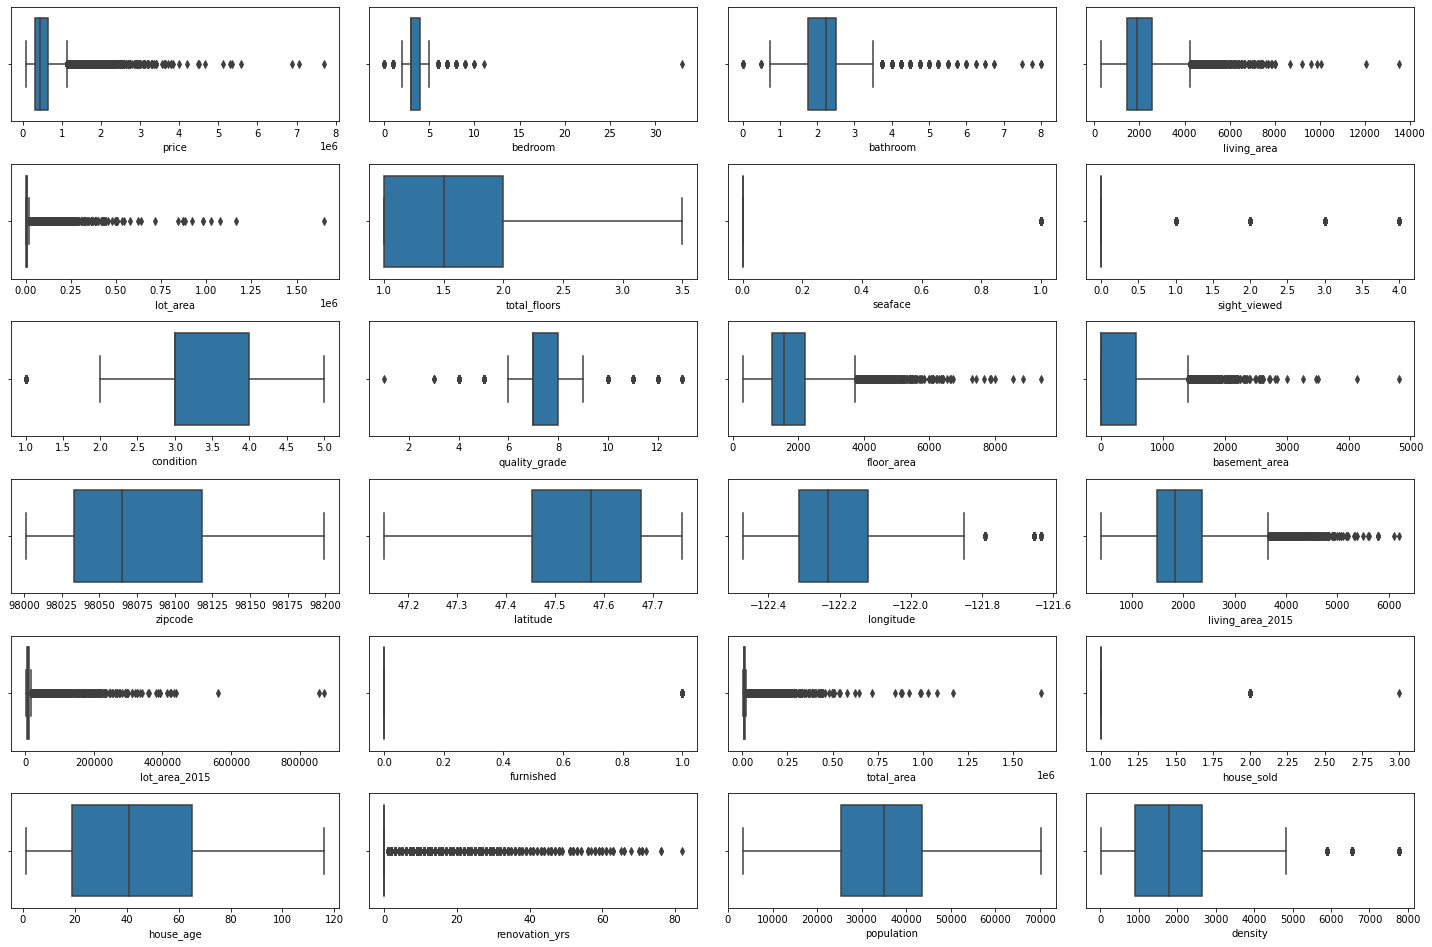

In [40]:
## let's boxplot all the numerical columns and see if there any outliers

data_plot=dataset[['price', 'bedroom', 'bathroom', 'living_area', 'lot_area',
       'total_floors', 'seaface', 'sight_viewed', 'condition', 'quality_grade',
       'floor_area', 'basement_area', 'zipcode', 'latitude', 'longitude',
       'living_area_2015', 'lot_area_2015', 'furnished', 'total_area',
       'house_sold', 'house_age', 'renovation_yrs', 'population', 'density']]

fig=plt.figure(figsize=(20,15));
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(7,4,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

Note: We can see that the dataset has many outliers in in many of the variables. We might have to treat them before modeling.

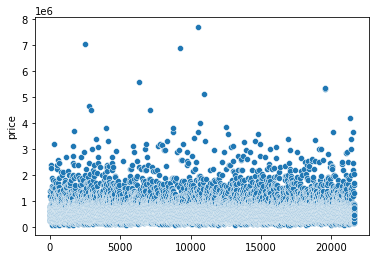

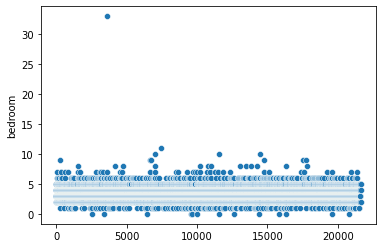

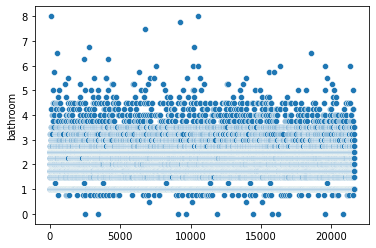

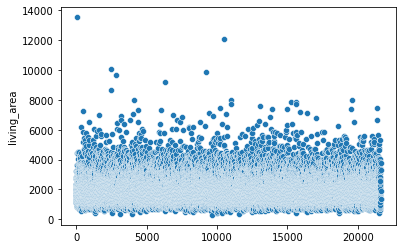

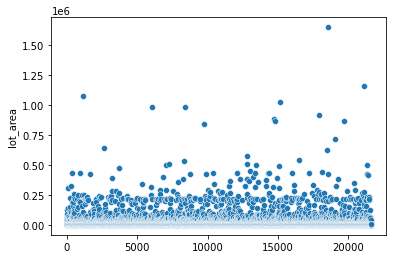

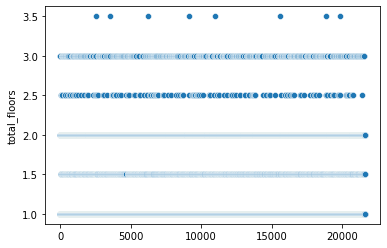

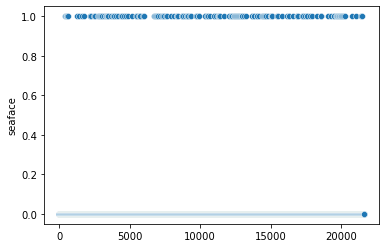

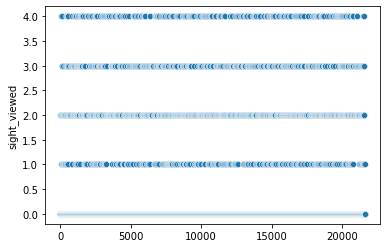

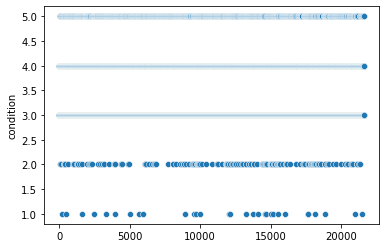

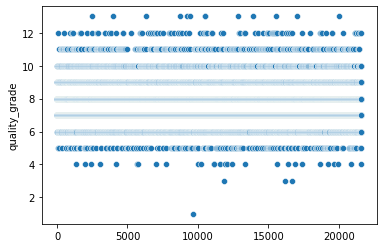

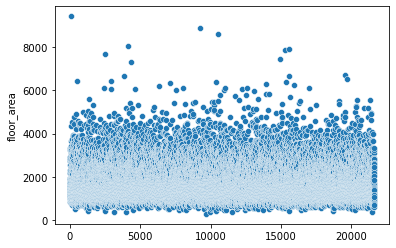

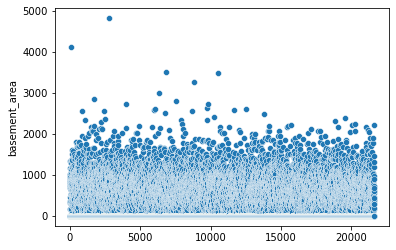

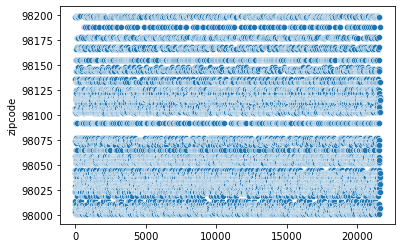

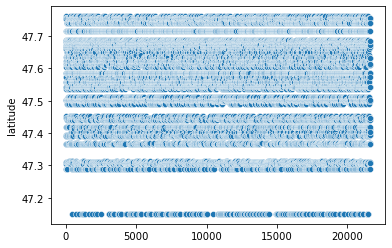

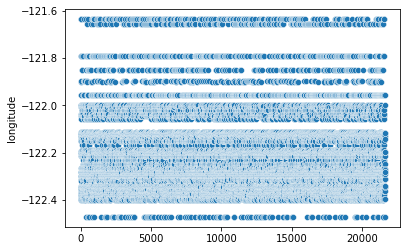

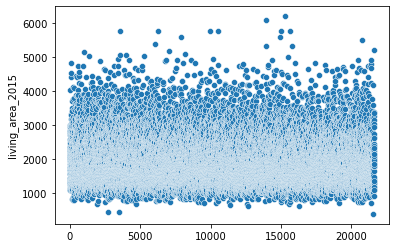

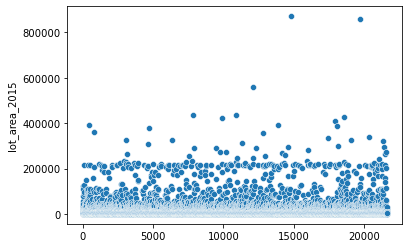

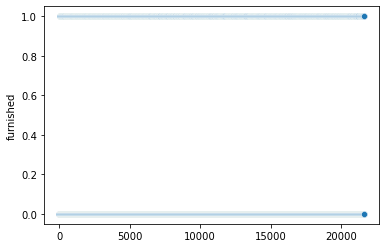

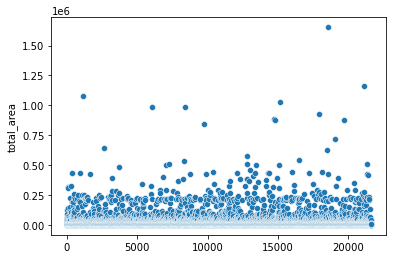

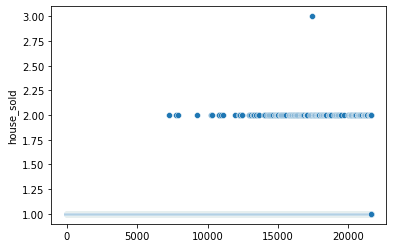

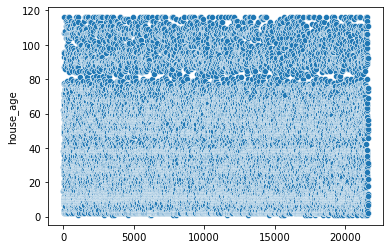

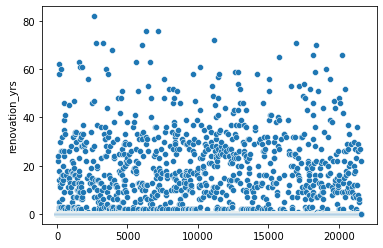

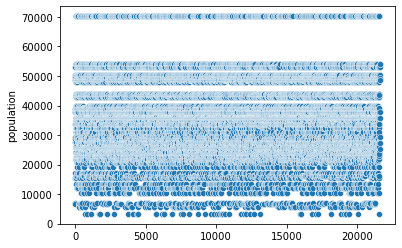

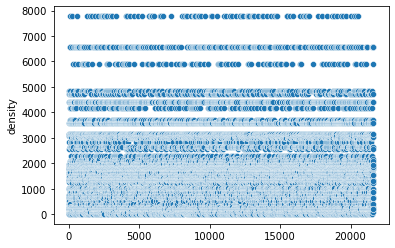

In [41]:
#scatter plot 
splot_cols=data_plot
for i in splot_cols:
    sns.scatterplot(x=dataset.index, y=dataset[i])
    plt.show()

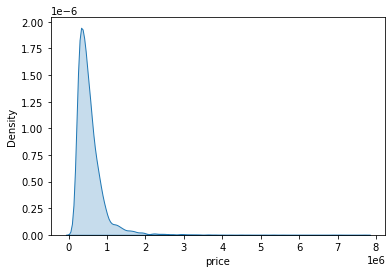

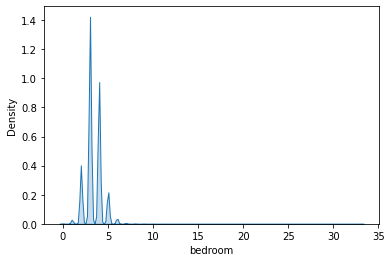

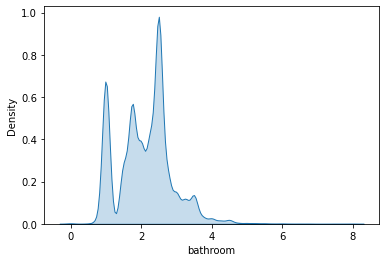

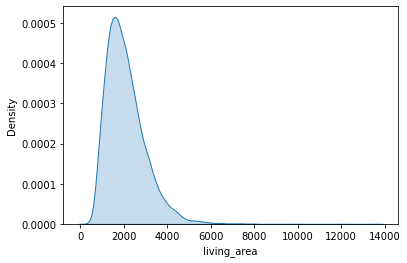

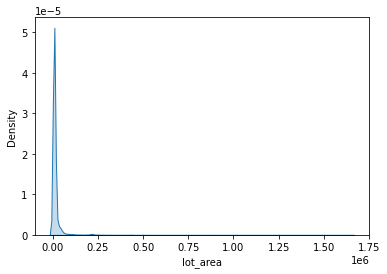

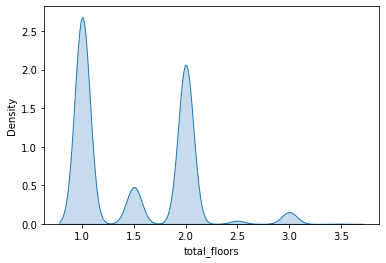

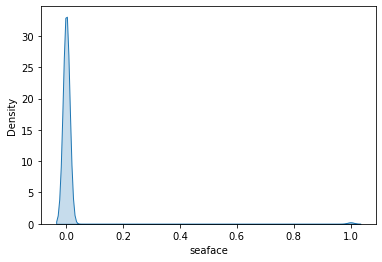

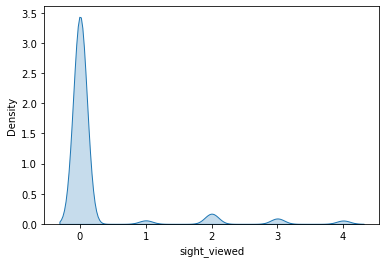

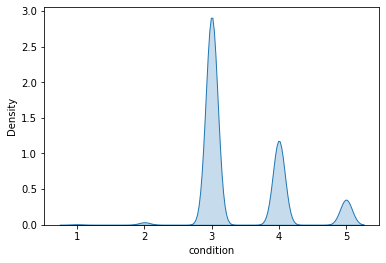

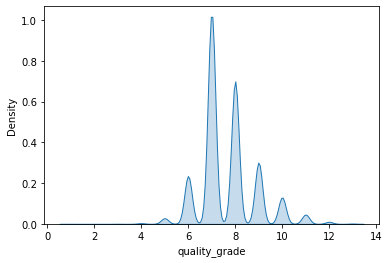

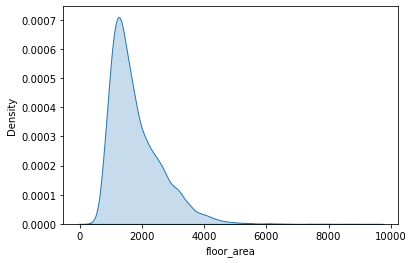

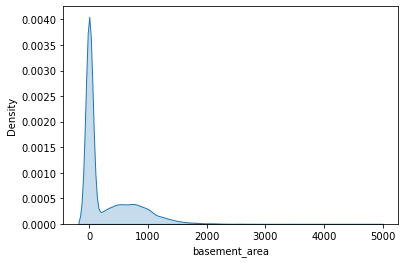

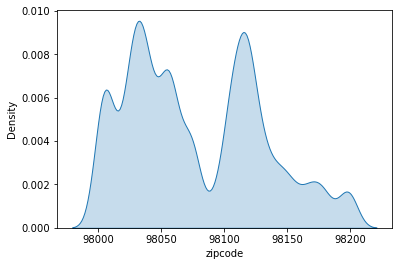

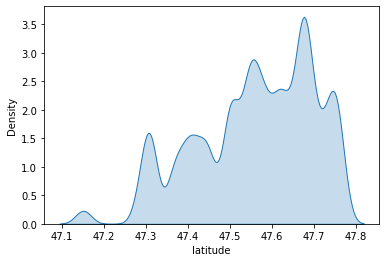

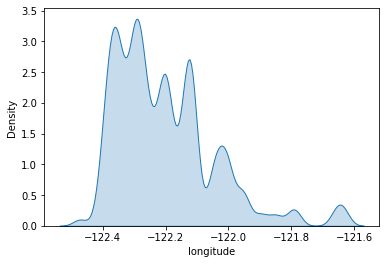

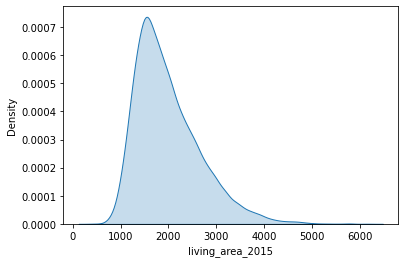

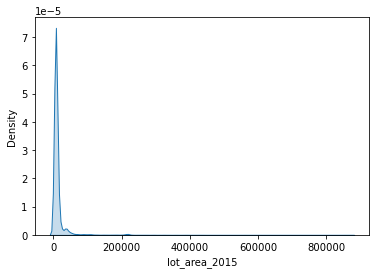

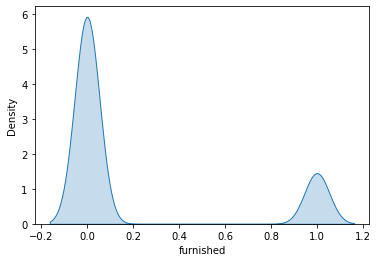

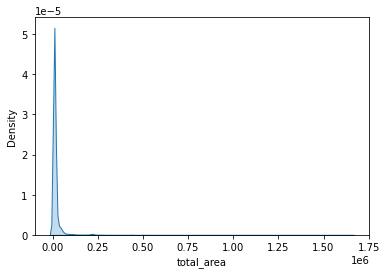

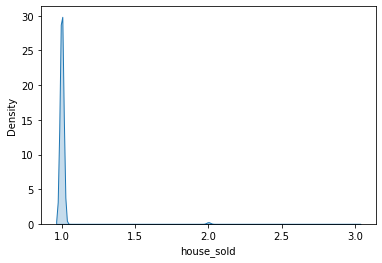

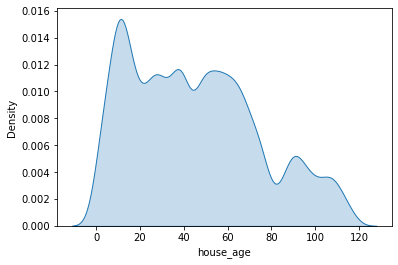

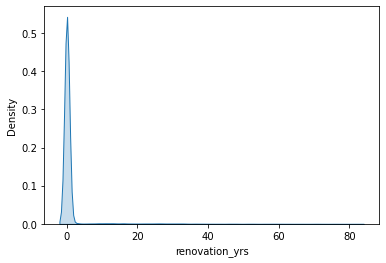

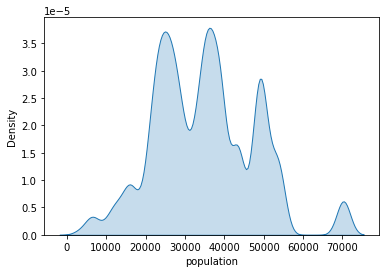

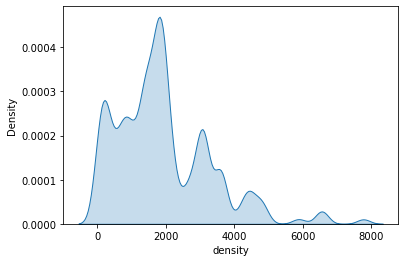

In [42]:
#density plot
for i in splot_cols:
    sns.kdeplot(dataset[i], shade=True)
    plt.show()

In [43]:
features = ['bedroom', 'bathroom', 'total_floors', 'seaface', 'sight_viewed', 'condition', 'quality_grade',
       'furnished', 'house_sold', 'house_age', 'renovation_yrs', 'city', 'state_name', 'county_name']
list(enumerate(features))

[(0, 'bedroom'),
 (1, 'bathroom'),
 (2, 'total_floors'),
 (3, 'seaface'),
 (4, 'sight_viewed'),
 (5, 'condition'),
 (6, 'quality_grade'),
 (7, 'furnished'),
 (8, 'house_sold'),
 (9, 'house_age'),
 (10, 'renovation_yrs'),
 (11, 'city'),
 (12, 'state_name'),
 (13, 'county_name')]

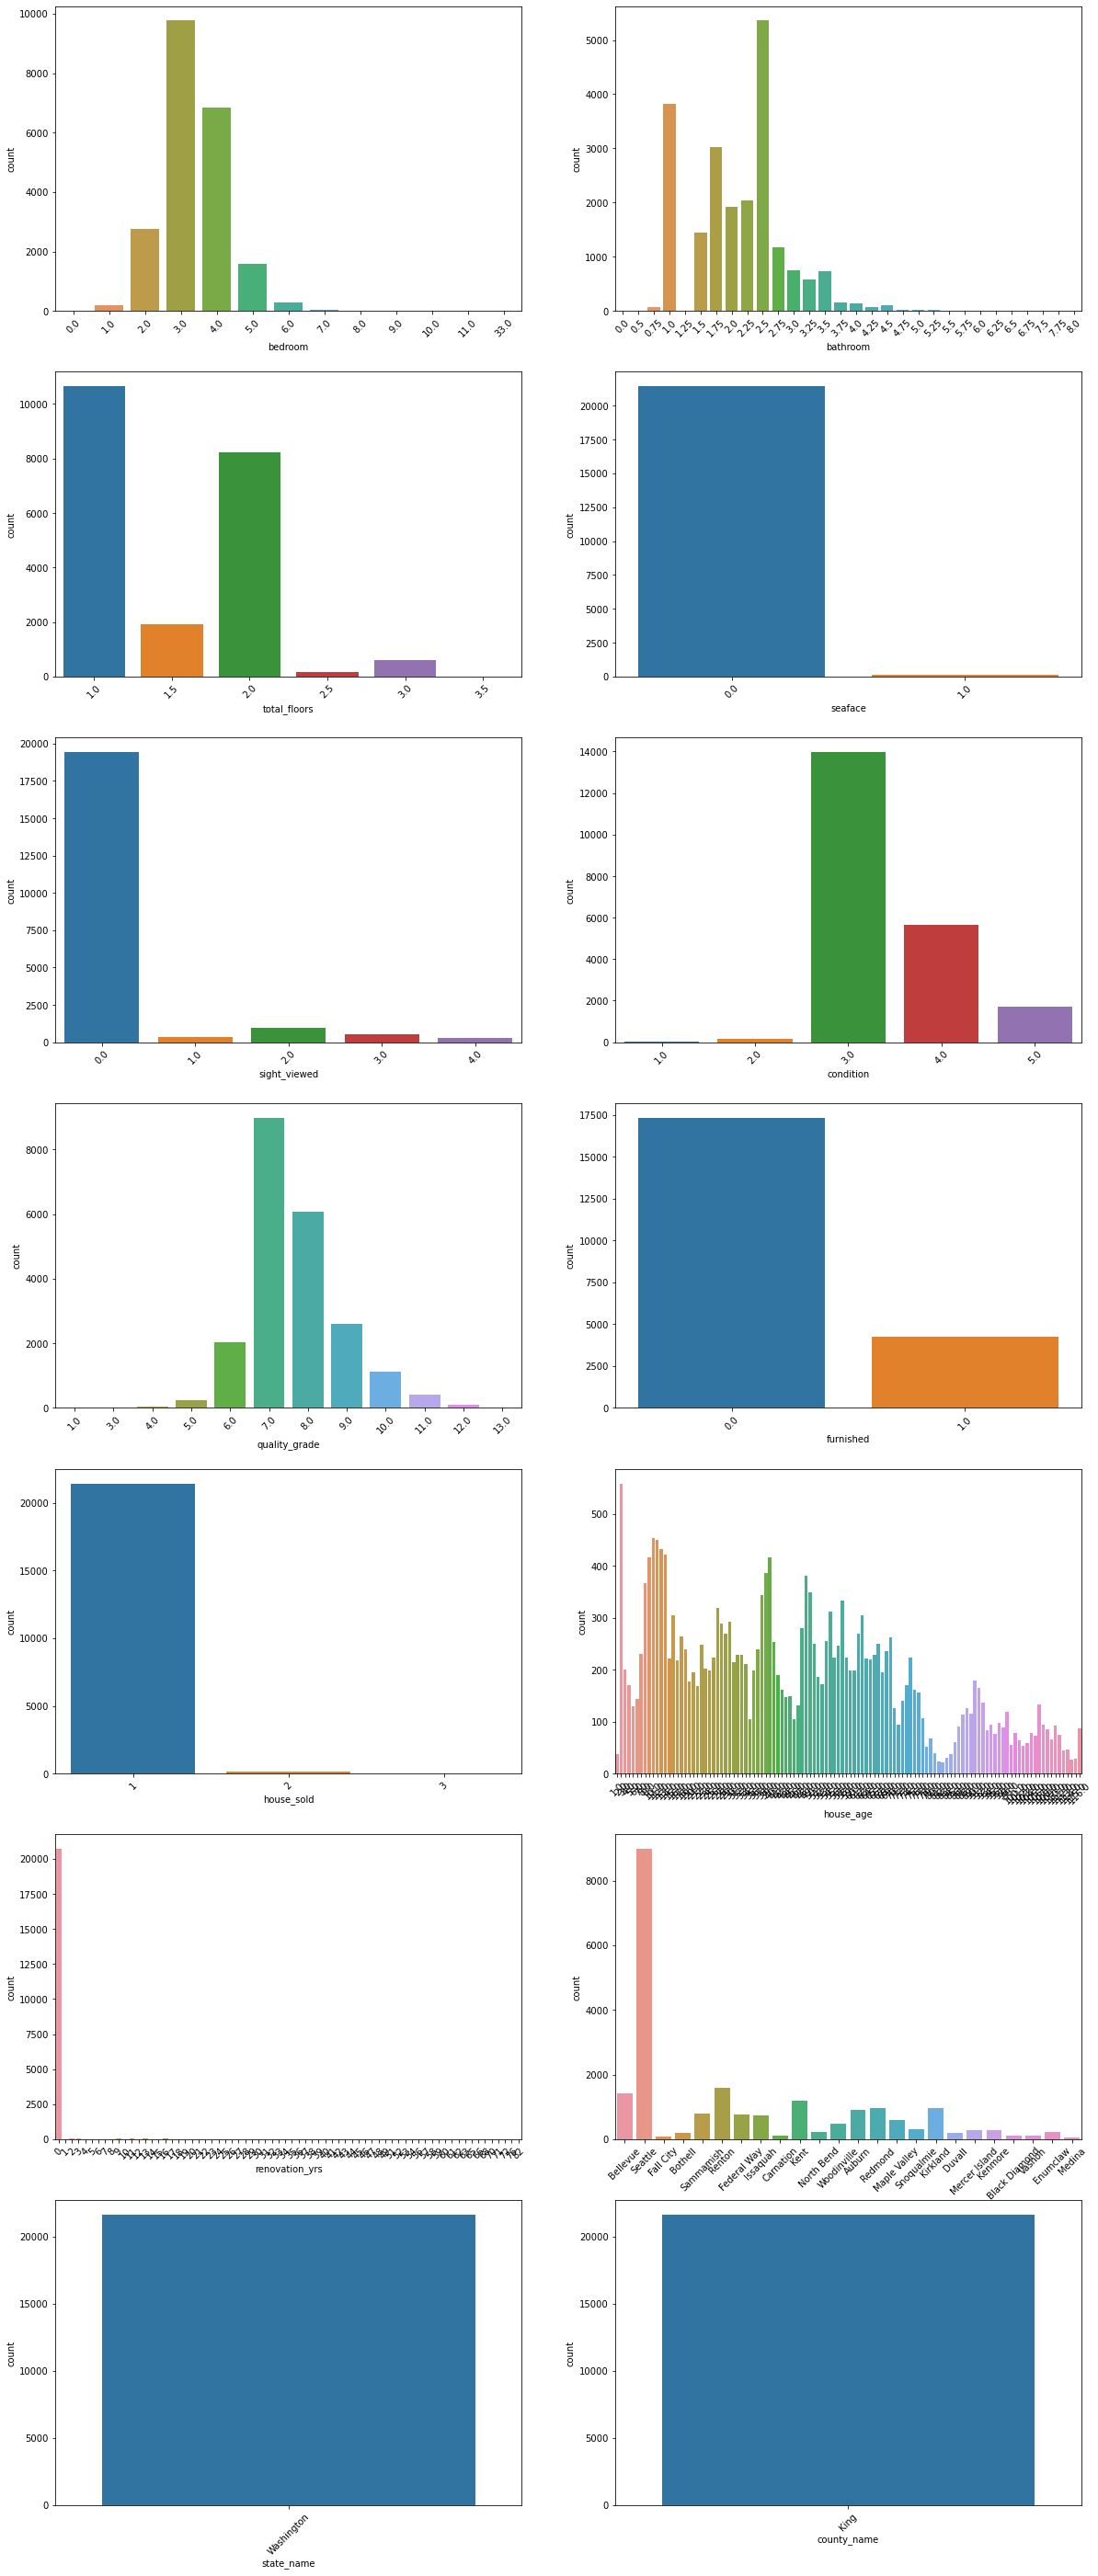

In [44]:
#count plot

plt.figure(figsize = (20, 50))
for i in enumerate(features):
    plt.subplot(7, 2,i[0]+1)
    sns.countplot(i[1], data = dataset)
    plt.xticks(rotation = 45)

#### Feature.1 Date

In [45]:
## converting dayhours into timestamp

dataset['sold_month'] = pd.to_datetime(dataset['date'], format='%Y-%m')
dataset['sold_month'] = dataset['sold_month'].apply(lambda x: x.strftime('%B-%Y'))
dataset['sold_month'].head()

0    May-2014
1    May-2014
2    May-2014
3    May-2014
4    May-2014
Name: sold_month, dtype: object

In [46]:
dataset['sold_month'].value_counts()

April-2015        2231
July-2014         2211
June-2014         2180
August-2014       1940
October-2014      1878
March-2015        1875
September-2014    1774
May-2014          1768
December-2014     1471
November-2014     1411
February-2015     1250
January-2015       978
May-2015           646
Name: sold_month, dtype: int64

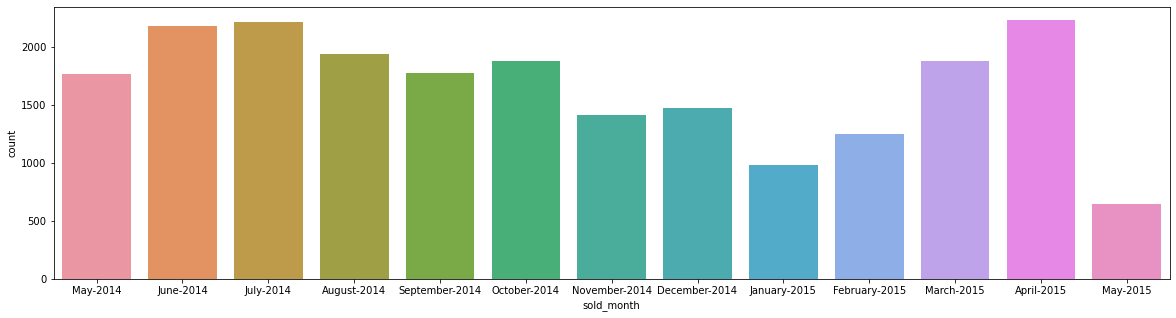

In [47]:
plt.figure(figsize = (20, 5))
sns.countplot(data = dataset, x= 'sold_month');

Note: The most number of house were sold in the month of April-2015 also in June and July 2014. 
The least were sold in month of May-2015.

#### Feature: House age

In [48]:
dataset['house_age'].value_counts()

2.0      559
10.0     454
11.0     450
12.0     433
13.0     421
        ... 
83.0      30
115.0     29
114.0     27
81.0      24
82.0      21
Name: house_age, Length: 116, dtype: int64

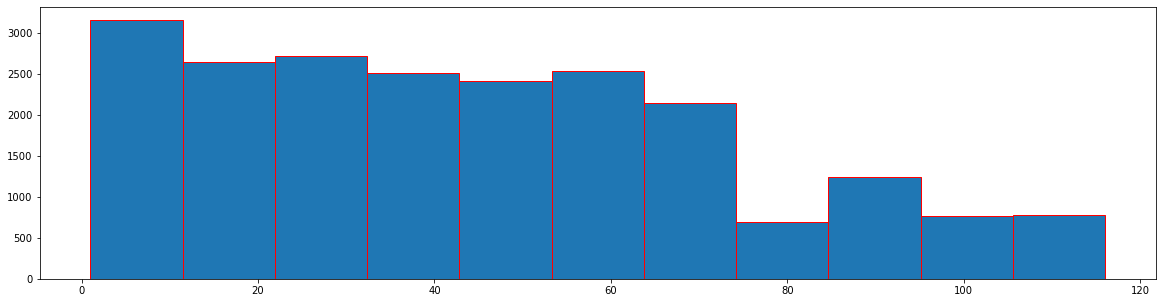

In [49]:
plt.figure(figsize = (20, 5))
plt.hist(dataset.house_age, edgecolor="red", bins=11)
plt.show()

#### Feature: Renovation Age of House

In [50]:
dataset['renovation_yrs'].value_counts()

0     20699
2        91
3        37
13       36
9        35
      ...  
57        1
72        1
68        1
65        1
62        1
Name: renovation_yrs, Length: 70, dtype: int64

Note: Most of the house are renovated within range of 10 years.

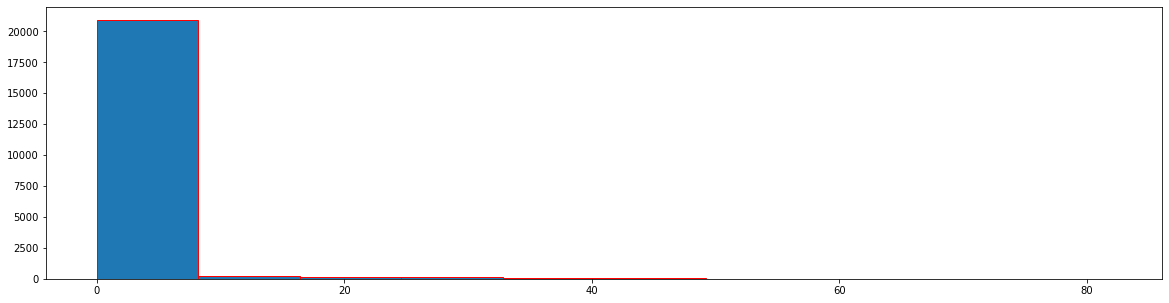

In [51]:
plt.figure(figsize = (20, 5))
plt.hist(dataset.renovation_yrs, edgecolor="red")
plt.show()

## Bi-Variate Analysis

### PairPlot

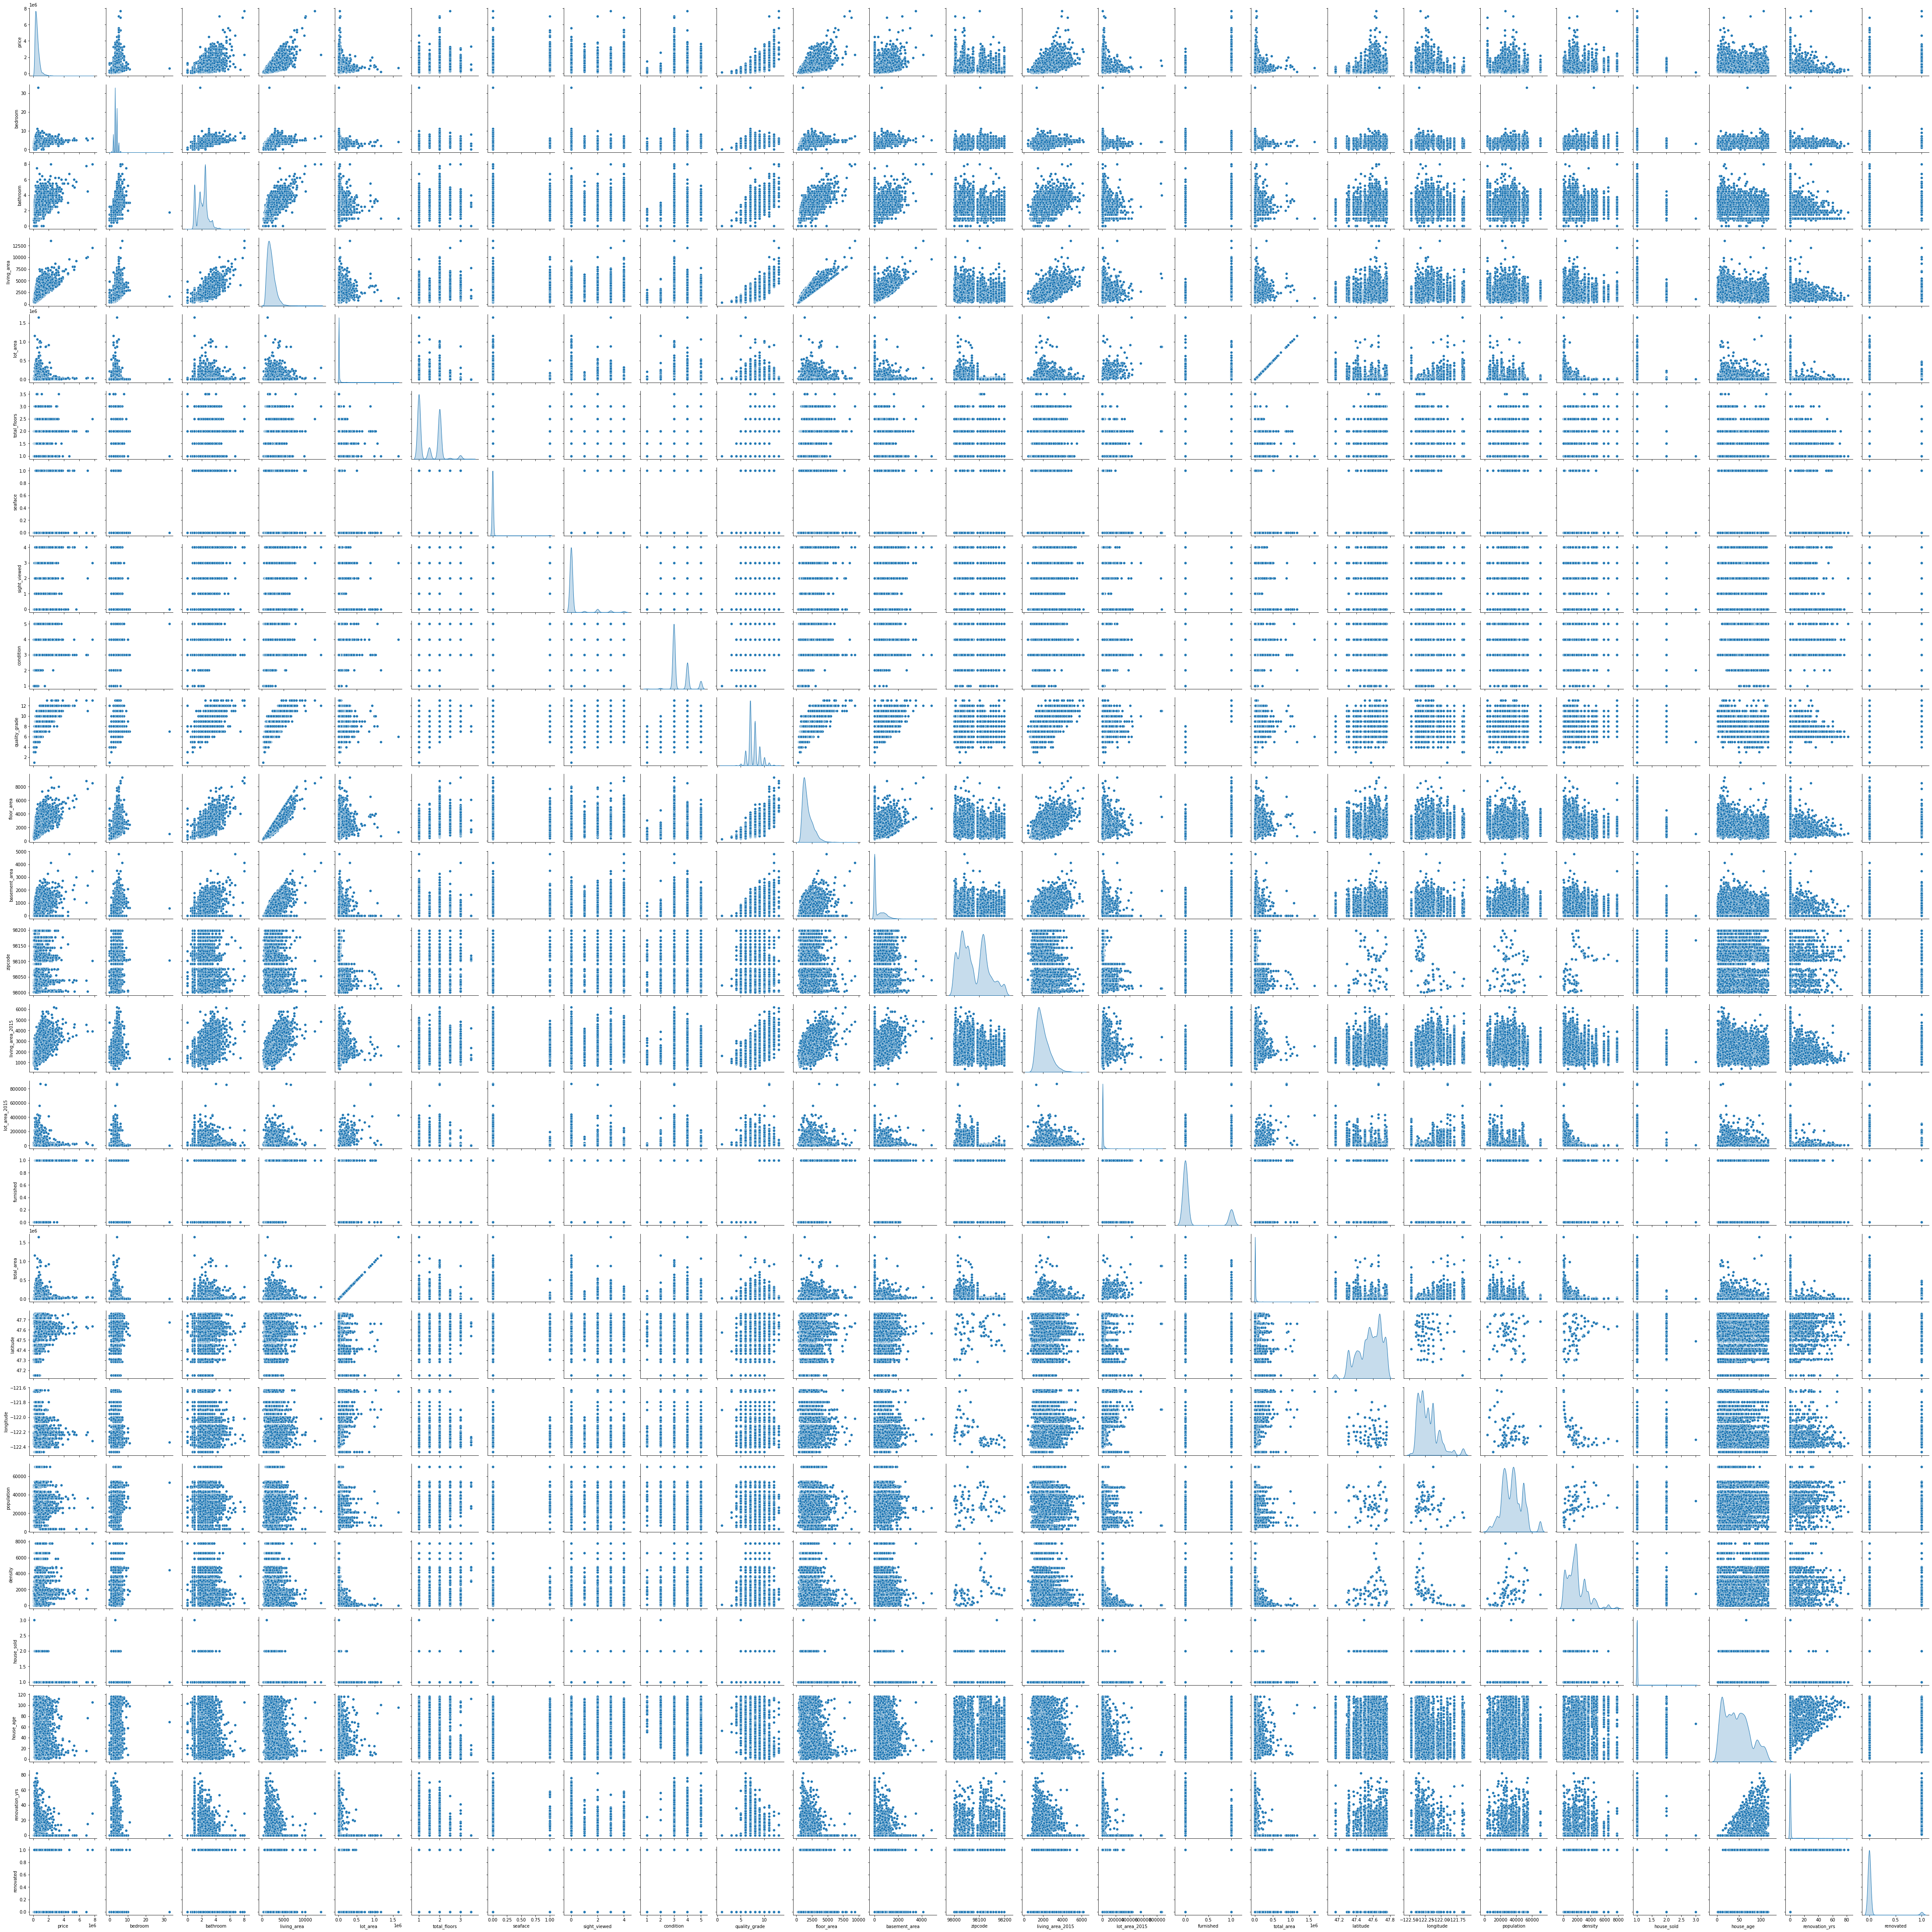

In [52]:
# plot all variables using correlation plot
sns.pairplot(dataset, diag_kind = 'kde');

In [53]:
# corelatoin between the different variables
dataset.corr(method ='pearson')

price   bedroom  bathroom  living_area  lot_area  \
price             1.000000  0.308040  0.525179     0.702149  0.089733   
bedroom           0.308040  1.000000  0.515778     0.576447  0.032051   
bathroom          0.525179  0.515778  1.000000     0.754617  0.088055   
living_area       0.702149  0.576447  0.754617     1.000000  0.172958   
lot_area          0.089733  0.032051  0.088055     0.172958  1.000000   
total_floors      0.257271  0.174590  0.500163     0.354278 -0.005383   
seaface           0.266297 -0.006266  0.062215     0.102638  0.021394   
sight_viewed      0.397522  0.078367  0.186939     0.284927  0.075144   
condition         0.035642  0.027766 -0.126339    -0.059174 -0.008795   
quality_grade     0.667477  0.356740  0.665037     0.762723  0.113869   
floor_area        0.605593  0.477708  0.685556     0.876653  0.183656   
basement_area     0.323825  0.302569  0.283389     0.435035  0.015400   
living_area_2015  0.585186  0.390823  0.568001     0.756188  0.145653   
lot_area_2015     0.082603  0.029484  0.087096     0.183548  0.717727   
furnished         0.566040  0.259316  0.485162     0.633157  0.119326   
total_area        0.104929  0.044579  0.104214     0.194346  0.999764   
latitude          0.306970 -0.003614  0.031170     0.057301 -0.096049   
longitude        -0.008844  0.110398  0.197894     0.206667  0.236885   
population       -0.089972  0.015522 -0.053054    -0.089535 -0.155048   
density           0.129517 -0.115859 -0.139484    -0.189088 -0.227684   
house_sold       -0.013645 -0.008833 -0.037603    -0.033893 -0.007664   
house_age        -0.053908 -0.154353 -0.506339    -0.317998 -0.053021   
renovation_yrs    0.072278 -0.008127  0.001363     0.022091  0.014112   
renovated         0.126101  0.018551  0.049710     0.054983  0.007884   

                  total_floors   seaface  sight_viewed  condition  \
price                 0.257271  0.266297      0.397522   0.035642   
bedroom               0.174590 -0.006266      0.078367   0.027766   
bathroom              0.500163  0.062215      0.186939  -0.126339   
living_area           0.354278  0.102638      0.284927  -0.059174   
lot_area             -0.005383  0.021394      0.075144  -0.008795   
total_floors          1.000000  0.024474      0.029645  -0.263975   
seaface               0.024474  1.000000      0.400906   0.017508   
sight_viewed          0.029645  0.400906      1.000000   0.045935   
condition            -0.263975  0.017508      0.045935   1.000000   
quality_grade         0.458385  0.082566      0.251095  -0.145370   
floor_area            0.524103  0.071389      0.167572  -0.158928   
basement_area        -0.245435  0.079327      0.277769   0.174238   
living_area_2015      0.278963  0.086139      0.280976  -0.094103   
lot_area_2015        -0.010937  0.030782      0.073020  -0.003174   
furnished             0.348179  0.069574      0.219995  -0.123141   
total_area            0.002785  0.023628      0.081022  -0.010036   
latitude              0.060807 -0.011399      0.003915  -0.015805   
longitude             0.117422 -0.039290     -0.062162  -0.095972   
population           -0.015345 -0.038875     -0.091240   0.042723   
density               0.048055 -0.016418      0.042111   0.067824   
house_sold           -0.038682 -0.007862     -0.011784  -0.017137   
house_age            -0.489169  0.025847      0.052873   0.361744   
renovation_yrs       -0.001634  0.099875      0.091867  -0.009873   
renovated             0.005919  0.088855      0.103219  -0.060247   

                  quality_grade  floor_area  basement_area  living_area_2015  \
price                  0.667477    0.605593       0.323825          0.585186   
bedroom                0.356740    0.477708       0.302569          0.390823   
bathroom               0.665037    0.685556       0.283389          0.568001   
living_area            0.762723    0.876653       0.435035          0.756188   
lot_area               0.113869    0.183656       0.015400          0

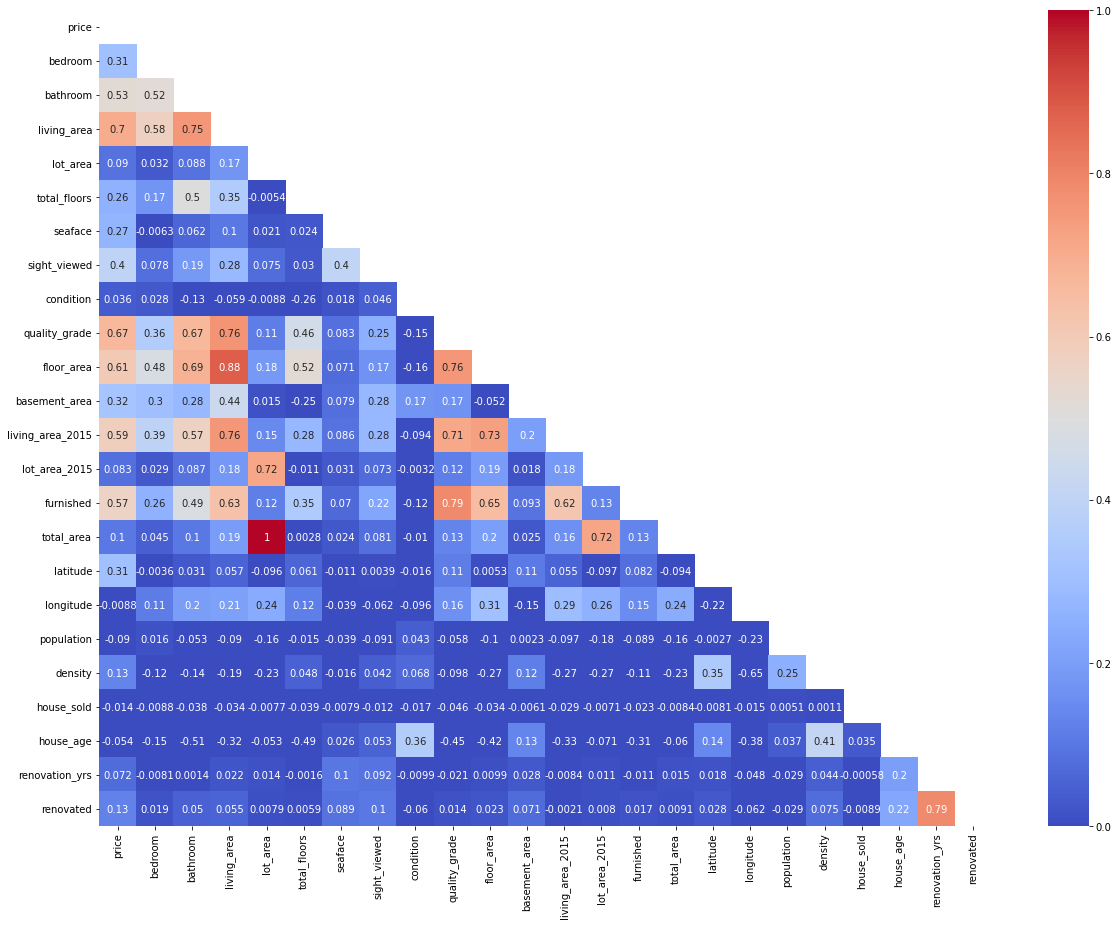

In [54]:
#correlation heatmap

plt.figure(figsize = (20,15))
sns.heatmap(dataset.corr(), annot=True,mask=np.triu(dataset.corr()),cmap ='coolwarm', vmin = 0, vmax= 1);

### Analyzing Bivariate for Feature

#### 1. Months vs Price
Variation in Price over the period of Months

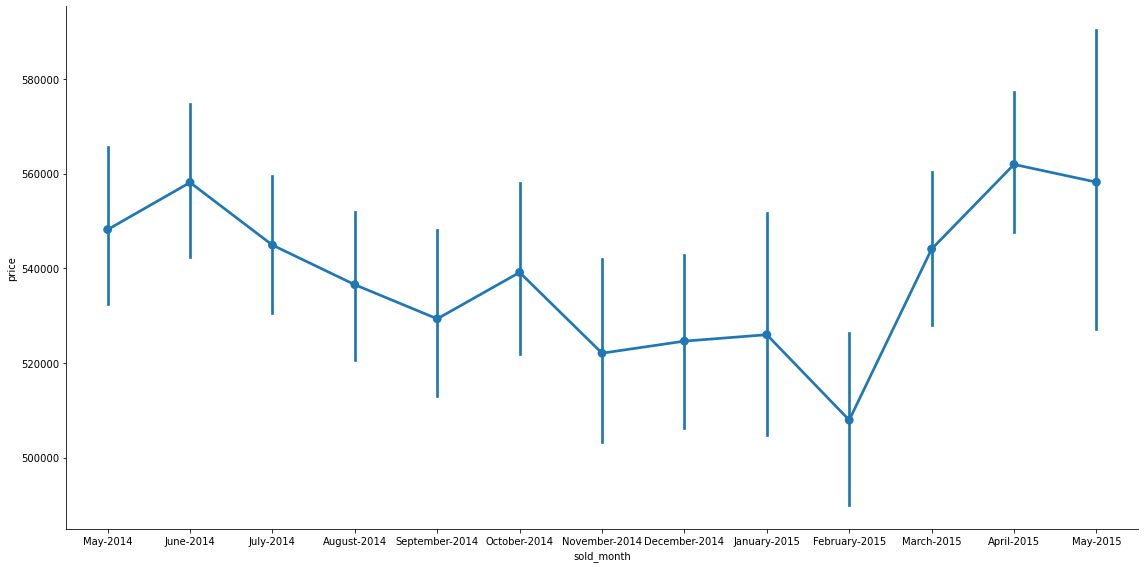

In [55]:
## At which month price was higher or lesser
sns.factorplot(x='sold_month',y='price',data=dataset, size=8, aspect=2 );

Note: We can see that in the month of Feb-2015, the prices were cheaper, whereas in the month of April. the price goes high.

#### 2. No. fo Bedrooms vs Price

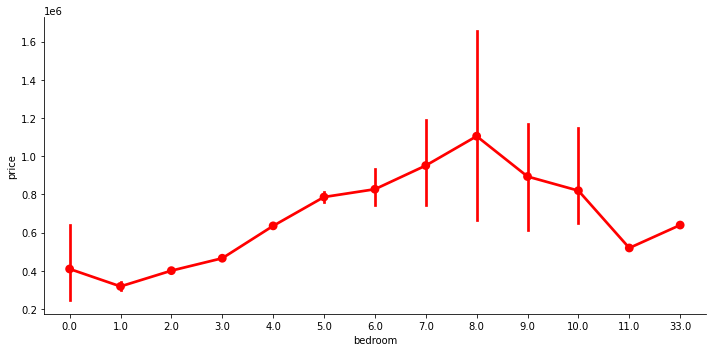

In [56]:
## how the number of bedroom affect the  price of house. 
sns.factorplot(x='bedroom',y='price',data=dataset, size=5, aspect=2, color='red' );

Note: We can see that price of the house increases as the number of bedroom increases, but after 8 bedrooms, price decreases.

#### 3. No. fo Bathrooms vs Price

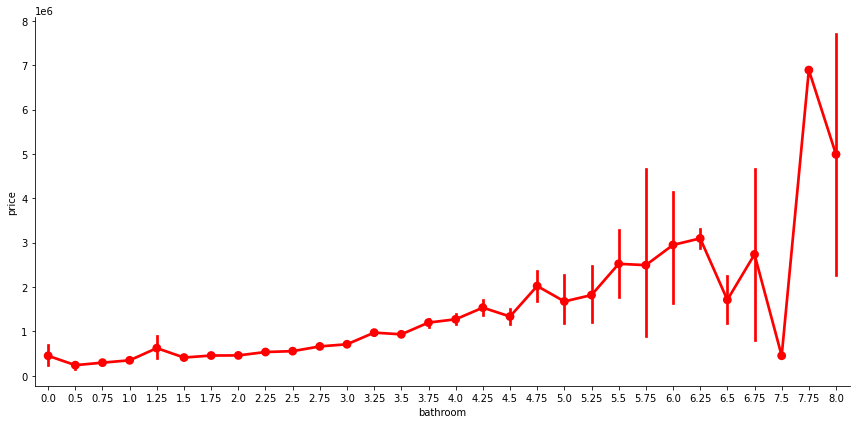

In [57]:
## how the number of bathroom affect the  price of house. 
sns.factorplot(x='bathroom',y='price',data=dataset, size=6, aspect=2, color='red' );

Note: The price surely increases slowly with increase in number of bathrooms but the price increase seems reasonable.

#### 4. No. of Floors vs Price

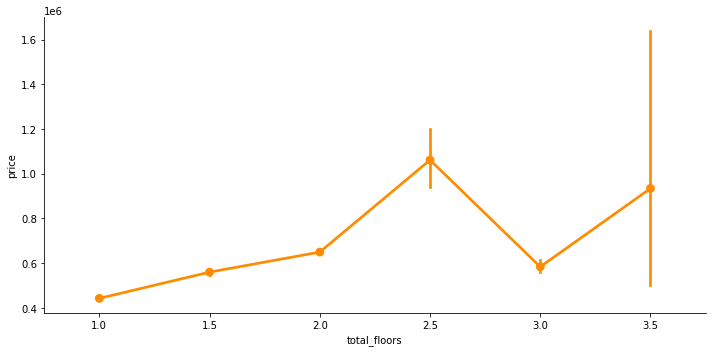

In [58]:
## how the number of bathroom affect the  price of house. 
sns.factorplot(x='total_floors',y='price',data=dataset, size=5, aspect=2, color='darkorange');

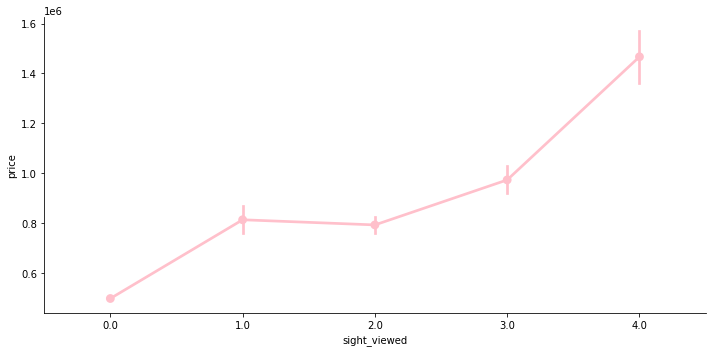

In [59]:
## how the sight vieweing affect the  purhcase pattern of customer. 
sns.factorplot(x='sight_viewed',y='price',data=dataset, size=5, aspect=2, color='pink' );

In [60]:
dataset.columns

Index(['date', 'price', 'bedroom', 'bathroom', 'living_area', 'lot_area',
       'total_floors', 'seaface', 'sight_viewed', 'condition', 'quality_grade',
       'floor_area', 'basement_area', 'zipcode', 'living_area_2015',
       'lot_area_2015', 'furnished', 'total_area', 'latitude', 'longitude',
       'city', 'state_name', 'population', 'density', 'county_name',
       'house_sold', 'house_age', 'renovation_yrs', 'renovated', 'sold_month'],
      dtype='object')

In [91]:
plotsizeX=8 
plotsizeY=5

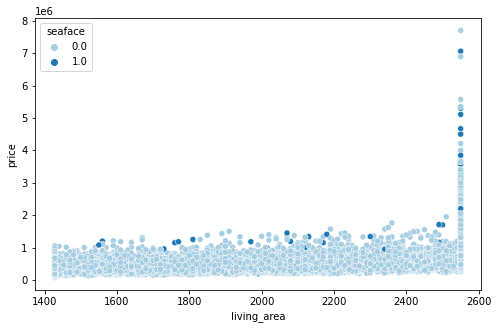

In [92]:
plt.figure(figsize=(plotsizeX, plotsizeY))
sns.scatterplot(dataset['living_area'],dataset['price'],hue=dataset['seaface'],palette='Paired',legend='full');

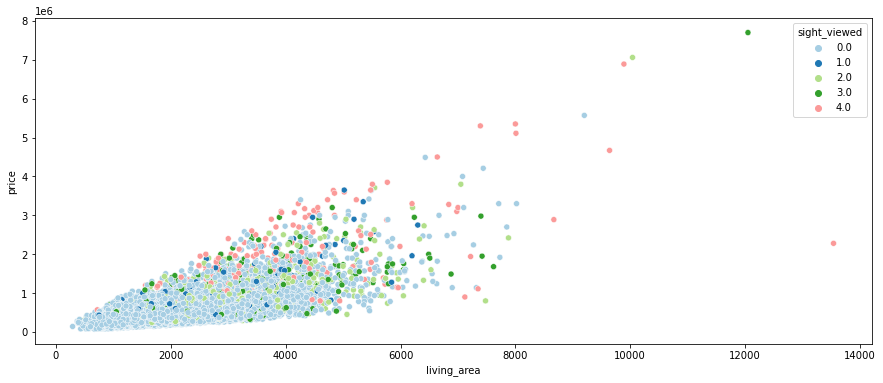

In [62]:
plt.figure(figsize=(plotsizeX, plotsizeY))
sns.scatterplot(dataset['living_area'],dataset['price'],hue=dataset['sight_viewed'],palette='Paired',legend='full');

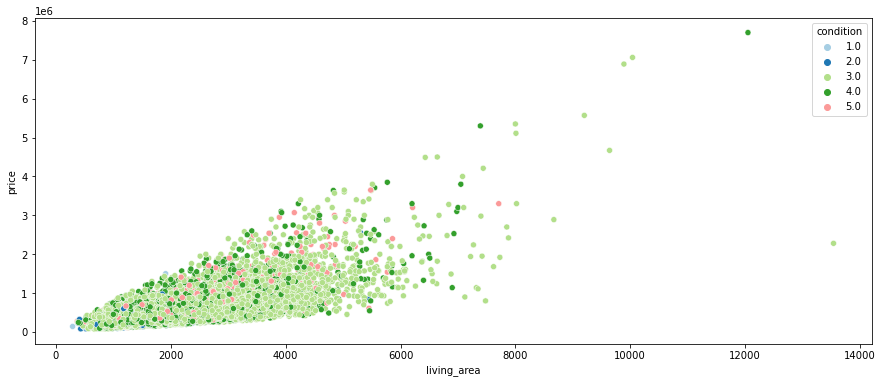

In [63]:
plt.figure(figsize=(plotsizeX, plotsizeY))
sns.scatterplot(dataset['living_area'],dataset['price'],hue=dataset['condition'],palette='Paired',legend='full');

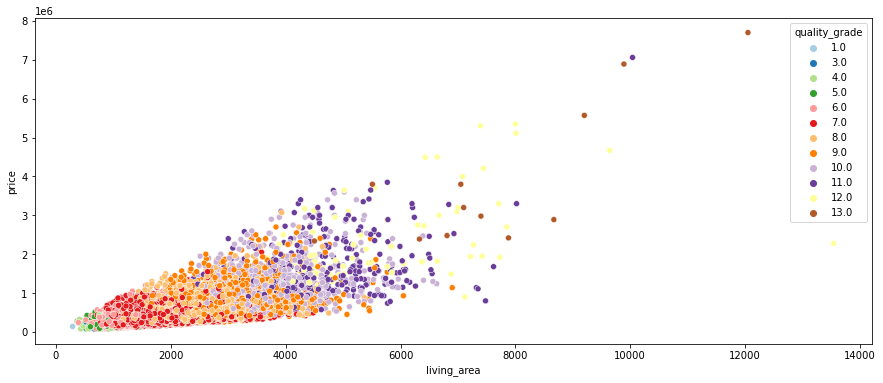

In [64]:
plt.figure(figsize=(plotsizeX, plotsizeY))
sns.scatterplot(dataset['living_area'],dataset['price'],hue=dataset['quality_grade'],palette='Paired',legend='full');

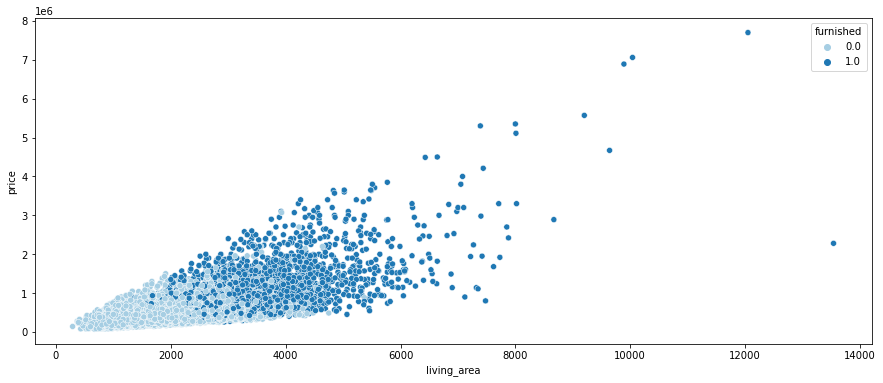

In [65]:
plt.figure(figsize=(plotsizeX, plotsizeY))
sns.scatterplot(dataset['living_area'],dataset['price'],hue=dataset['furnished'],palette='Paired',legend='full');

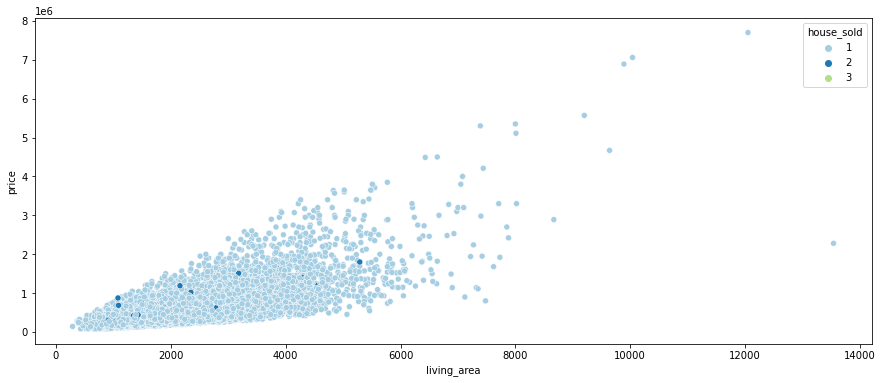

In [66]:
plt.figure(figsize=(plotsizeX, plotsizeY))
sns.scatterplot(dataset['living_area'],dataset['price'],hue=dataset['house_sold'],palette='Paired',legend='full');

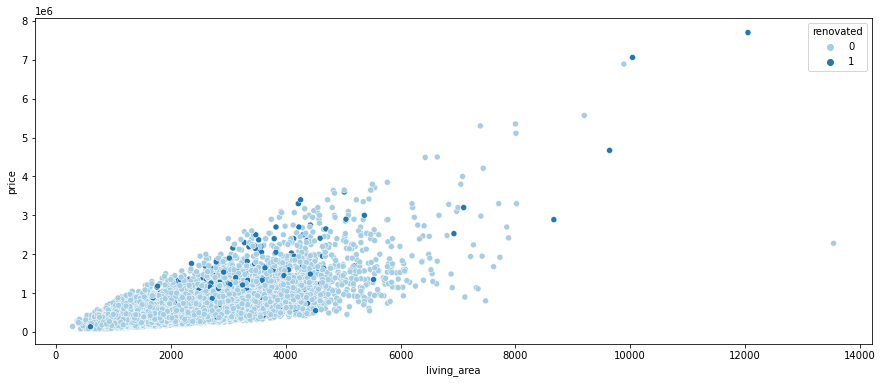

In [67]:
plt.figure(figsize=(plotsizeX, plotsizeY))
sns.scatterplot(dataset['living_area'],dataset['price'],hue=dataset['renovated'],palette='Paired',legend='full');

Note: This shows that property of higher cost has more number of sights. 

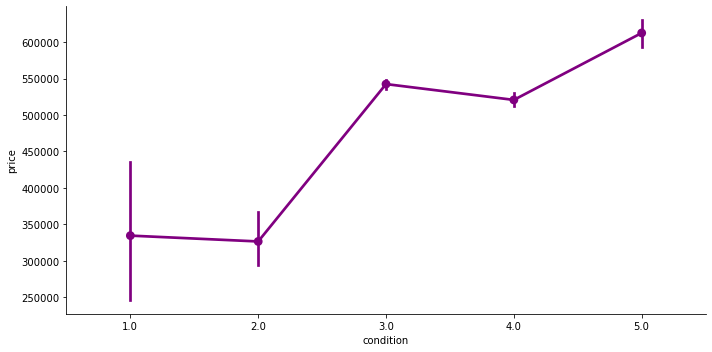

In [68]:
## how the condition of house affect the  price of house 
sns.factorplot(x='condition',y='price',data=dataset, size=5, aspect=2, color='purple' );

Note: House with better condition cost more.

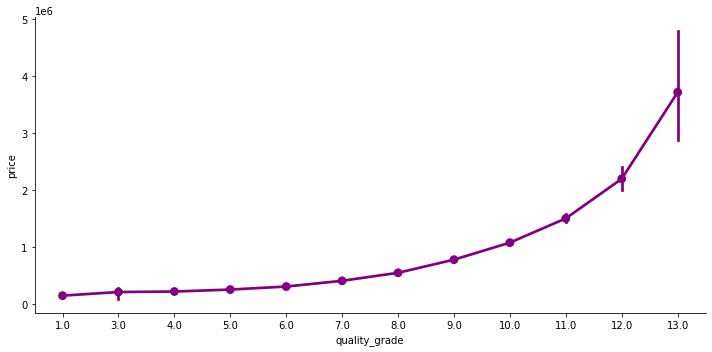

In [69]:
## how the consition of house affect the  price of house 
sns.factorplot(x='quality_grade',y='price',data=dataset, size=5, aspect=2, color='purple' );

Note: better the quality grade ratings, higher the price.

#### Plotting all type of areas vs Price

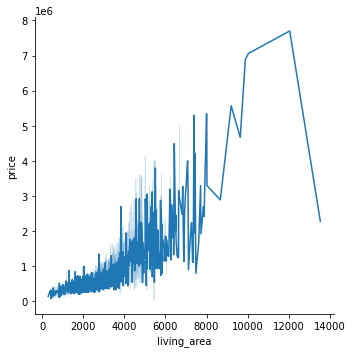

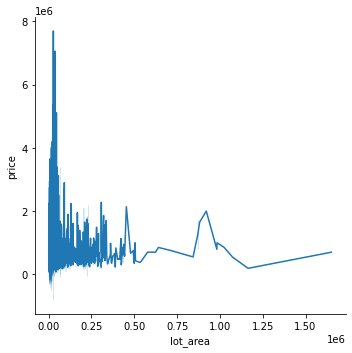

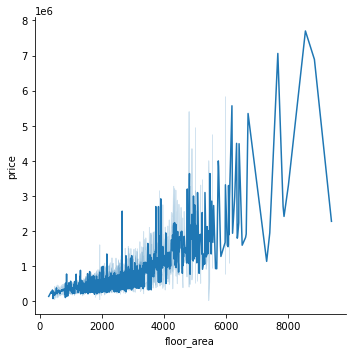

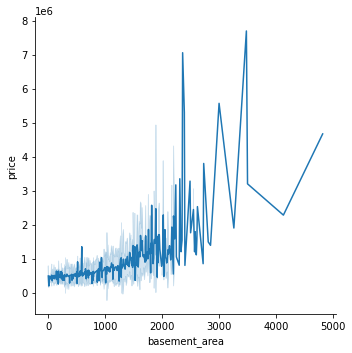

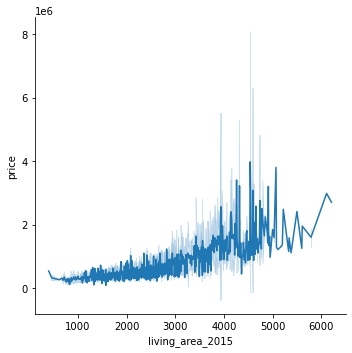

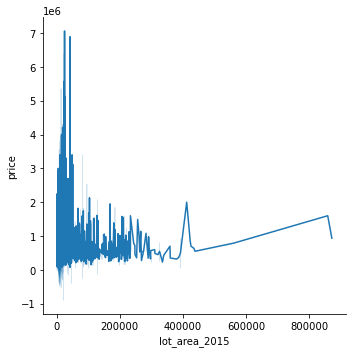

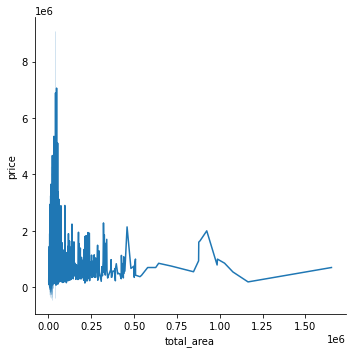

In [70]:
area_col = ('living_area', 'lot_area', 'floor_area', 'basement_area',  'living_area_2015', 
                    'lot_area_2015', 'total_area')

for i in area_col:
    sns.relplot(x=i, y='price', kind="line", ci="sd", data=dataset);
    plt.show()

Note: In most of the case, when the square foot measure/area of the house increases then the price also increases. But, we also saw that cost for the area of very large houses shoots up.

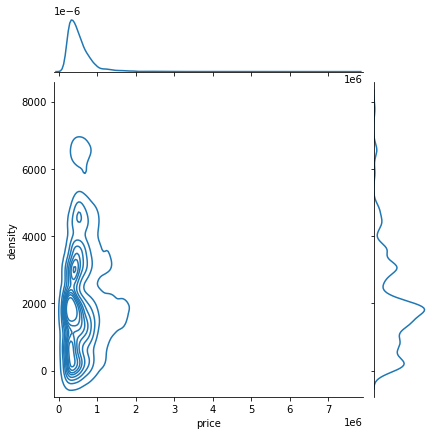

In [71]:
sns.jointplot(x="price", y="density",kind='kde', data=dataset);

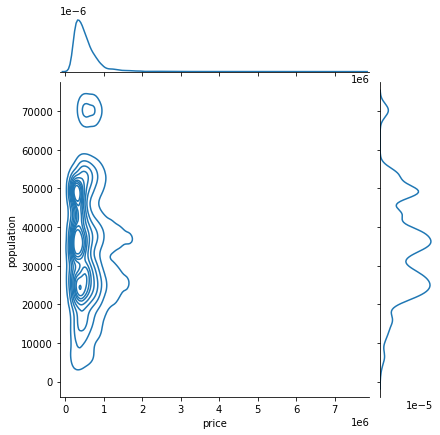

In [72]:
sns.jointplot(x="price", y="population",kind='kde', data=dataset);

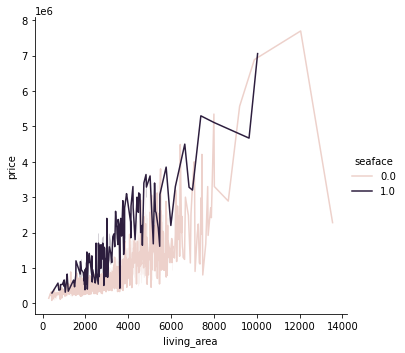

In [73]:
sns.relplot(data=dataset, x='living_area',  y='price', hue='seaface', kind='line')  

Note: This shows that seaface properties are higher the cost.

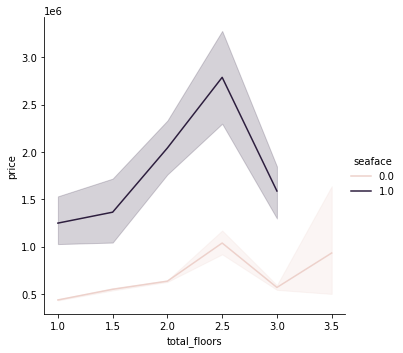

In [74]:
sns.relplot(data=dataset, x='total_floors',  y='price', hue='seaface', kind='line');  

Note: the property with seafacing front are costlier than the house without any seafacing front. But it also shows that how with increase in number of floors the seaface house cost so costlier.

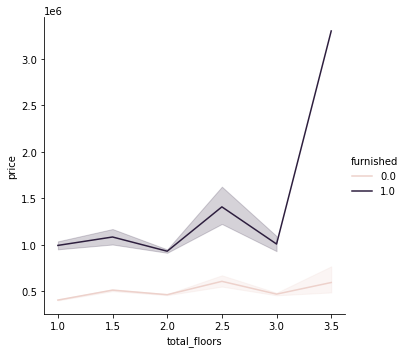

In [75]:
sns.relplot(data=dataset, x='total_floors',  y='price', hue='furnished', kind='line');

Note: This shows that the furnished house has higher cost and as the number of floors increases beyond 3 then the cost of the house shoots up for furnished house.

<Figure size 720x2592 with 0 Axes>

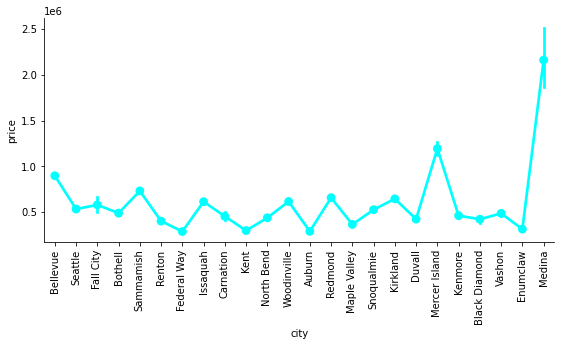

In [76]:
plt.figure(figsize=(10,36))
sns.factorplot(x='city',y='price',data=dataset, size = 4, aspect = 2, color='cyan' )
plt.xticks(rotation=90);

## DATA PROCESSING

### Treating Outliers

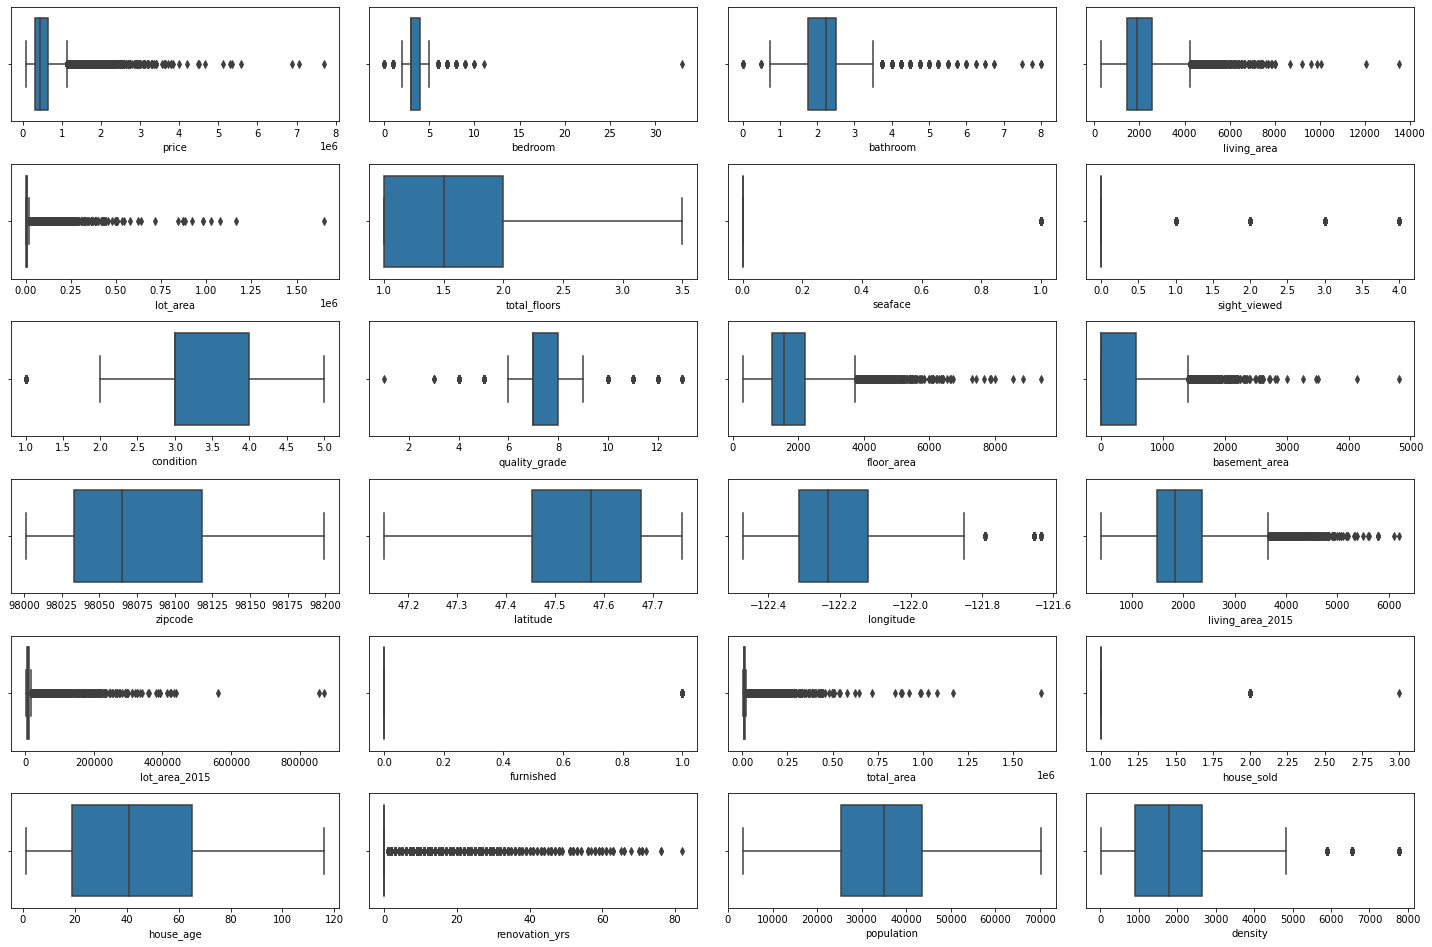

In [77]:
## let's boxplot all the numerical columns and see if there any outliers

data_plot=dataset[['price', 'bedroom', 'bathroom', 'living_area', 'lot_area',
       'total_floors', 'seaface', 'sight_viewed', 'condition', 'quality_grade',
       'floor_area', 'basement_area', 'zipcode', 'latitude', 'longitude',
       'living_area_2015', 'lot_area_2015', 'furnished', 'total_area',
       'house_sold', 'house_age', 'renovation_yrs', 'population', 'density']]

fig=plt.figure(figsize=(20,15));
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(7,4,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

Note: We can see that we can see the outliers that might affect our results. They lie in 

####  Treat outlier in the bedroom

In [78]:
## Property with 33 bedrooms seems a very odd outlier which we can remove.
dataset.drop(dataset[ (dataset.bedroom == 33) ].index, inplace=True)

In [79]:
#checking the data
dataset[ (dataset.bedroom == 33) ]

Empty DataFrame
Columns: [date, price, bedroom, bathroom, living_area, lot_area, total_floors, seaface, sight_viewed, condition, quality_grade, floor_area, basement_area, zipcode, living_area_2015, lot_area_2015, furnished, total_area, latitude, longitude, city, state_name, population, density, county_name, house_sold, house_age, renovation_yrs, renovated, sold_month]
Index: []

#### Main variables from which we wish to treat outliers

Shape before Outliers Treatment (21612, 30)


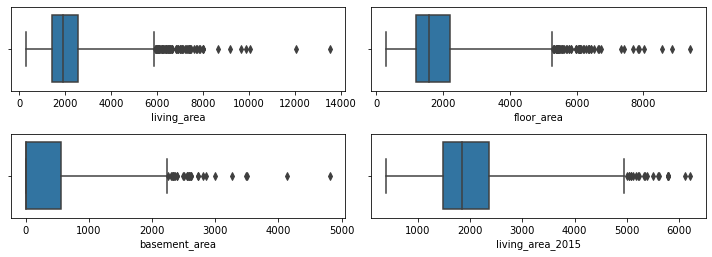

In [80]:
data_plot=dataset[['living_area', 'floor_area', 'basement_area', 'living_area_2015']]
fig=plt.figure(figsize=(10,5))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]], whis=3)
    plt.tight_layout()
print('Shape before Outliers Treatment',dataset.shape)

In [81]:
out_data=dataset[['living_area', 'floor_area', 'basement_area', 'living_area_2015']]

for i in out_data:
    lr = dataset[i].quantile(0.25)
    ur = dataset[i].quantile(0.75)
    dataset[i] = np.where(dataset[i] <lr, lr,dataset[i])
    dataset[i] = np.where(dataset[i] >ur, ur,dataset[i])

Shape after Outliers Treatment (21612, 30)


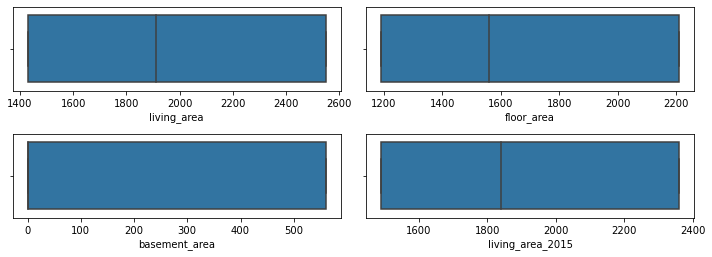

In [82]:
data_plot=dataset[['living_area', 'floor_area', 'basement_area', 'living_area_2015']]
fig=plt.figure(figsize=(10,5))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]], whis=3)
    plt.tight_layout()
print('Shape after Outliers Treatment',dataset.shape)

### encoding of categorical variables 

In [83]:
lis = []
for i in range(0, dataset.shape[1]):
     
    if(dataset.iloc[:,i].dtypes == 'object'):
        dataset.iloc[:,i] = pd.Categorical(dataset.iloc[:,i])
        dataset.iloc[:,i] = dataset.iloc[:,i].cat.codes 
        dataset.iloc[:,i] = dataset.iloc[:,i].astype('object')
        lis.append(dataset.columns[i])

### Imputing the missing values

In [84]:
dataset.isnull().sum()

date                  0
price                 0
bedroom             108
bathroom            108
living_area          17
lot_area             42
total_floors         72
seaface              31
sight_viewed         57
condition            85
quality_grade         1
floor_area            1
basement_area         1
zipcode               0
living_area_2015    166
lot_area_2015        29
furnished            29
total_area           68
latitude              0
longitude             0
city                  0
state_name            0
population            0
density               0
county_name           0
house_sold            0
house_age            15
renovation_yrs        0
renovated             0
sold_month            0
dtype: int64

In [85]:
dataset.isnull().sum().sum()

830

In [86]:
missing_col = ['bedroom', 'bathroom', 'living_area', 'lot_area', 'total_floors', 'seaface', 'sight_viewed', 'condition',
              'quality_grade', 'floor_area','basement_area', 'living_area_2015','lot_area_2015','furnished','total_area',
               'house_age']
 
#Technique 2: Using median to impute the missing values
for i in missing_col:
    dataset.loc[dataset.loc[:,i].isnull(),i]=dataset.loc[:,i].median()

print("count of NULL values after imputation\n")
dataset.isnull().sum()

count of NULL values after imputation



date                0
price               0
bedroom             0
bathroom            0
living_area         0
lot_area            0
total_floors        0
seaface             0
sight_viewed        0
condition           0
quality_grade       0
floor_area          0
basement_area       0
zipcode             0
living_area_2015    0
lot_area_2015       0
furnished           0
total_area          0
latitude            0
longitude           0
city                0
state_name          0
population          0
density             0
county_name         0
house_sold          0
house_age           0
renovation_yrs      0
renovated           0
sold_month          0
dtype: int64

In [87]:
dataset.head()

date   price  bedroom  bathroom  living_area  lot_area  total_floors  \
0 2014-05-02  435000      4.0      1.00       1450.0    8800.0           1.0   
1 2014-05-02  257950      3.0      1.75       1428.5    5858.0           1.0   
2 2014-05-02  335000      3.0      2.25       1580.0   16215.0           1.0   
3 2014-05-02  445700      3.0      2.50       1428.5    1180.0           3.0   
4 2014-05-02  470000      5.0      2.50       2210.0    9655.0           1.0   

   seaface  sight_viewed  condition  quality_grade  floor_area  basement_area  \
0      0.0           0.0        4.0            7.0      1450.0            0.0   
1      0.0           0.0        3.0            7.0      1370.0            0.0   
2      0.0           0.0        4.0            7.0      1580.0            0.0   
3      0.0           0.0        3.0            8.0      1270.0            0.0   
4      0.0           0.0        3.0            8.0      1460.0          560.0   

  zipcode  living_area_2015  lot_area_2015  furnished  total_area  latitude  \
0       5            1490.0         8942.0        0.0     10250.0  47.55748   
1      68            1490.0         7500.0        0.0      7228.0  47.39460   
2      14            1490.0        16215.0        0.0     17795.0  47.57493   
3      45            1490.0         1180.0        0.0      2450.0  47.66762   
4       9            2080.0         8633.0        0.0     11865.0  47.75338   

   longitude city state_name  population  density county_name  house_sold  \
0 -122.15081    1          0       37871   1365.3           0           1   
1 -122.31122   20          0       37966   1901.3           0           1   
2 -121.90112    7          0        6890    111.2           0           1   
3 -122.37810   20          0       27534   4838.8           0           1   
4 -122.20189    3          0       33830   1592.6           0           1   

   house_age  renovation_yrs  renovated sold_month  
0       62.0               0          0          8  
1       29.0               0          0          8  
2       38.0               0          0          8  
3       15.0               0          0          8  
4       40.0               0          0          8

### Checking the Variance Inflation Factor
There might be redundant variables in the dataset, to eliminate which we should use VIF.

In [96]:
dataset.columns

Index(['date', 'price', 'bedroom', 'bathroom', 'living_area', 'lot_area',
       'total_floors', 'seaface', 'sight_viewed', 'condition', 'quality_grade',
       'floor_area', 'basement_area', 'zipcode', 'living_area_2015',
       'lot_area_2015', 'furnished', 'total_area', 'latitude', 'longitude',
       'city', 'state_name', 'population', 'density', 'county_name',
       'house_sold', 'house_age', 'renovation_yrs', 'renovated', 'sold_month'],
      dtype='object')

In [104]:
Selected_features = dataset[['price','bedroom', 'bathroom', 'living_area', 'lot_area',
       'total_floors', 'seaface', 'sight_viewed', 'condition', 'quality_grade',
       'floor_area', 'basement_area', 'zipcode', 'living_area_2015',
       'lot_area_2015', 'furnished', 'total_area', 'city', 'population', 'density',
       'house_sold', 'house_age', 'renovation_yrs', 'renovated']]

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [105]:
#zipcode & city is changed from object datatype to int
Selected_features = Selected_features.astype({'zipcode':'int64', 'city':'int64'})

In [106]:
X = Selected_features.drop('price', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
15        total_area  363.035021
3           lot_area  346.774194
2        living_area  148.550239
8      quality_grade  137.068380
9         floor_area  131.925080
19        house_sold   73.900986
12  living_area_2015   72.429969
7          condition   32.589932
1           bathroom   27.207094
0            bedroom   25.379091
4       total_floors   19.626009
16              city   18.957518
11           zipcode   15.631009
17        population    9.484201
20         house_age    8.705761
18           density    5.734613
10     basement_area    4.702238
22         renovated    2.922260
14         furnished    2.779957
21    renovation_yrs    2.731484
13     lot_area_2015    2.616257
6       sight_viewed    1.513024
5            seaface    1.215772

In [107]:
X = X.drop('total_area', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
2        living_area  148.233416
8      quality_grade  137.045955
9         floor_area  131.823439
18        house_sold   73.808347
12  living_area_2015   72.420222
7          condition   32.579558
1           bathroom   27.154704
0            bedroom   25.364552
4       total_floors   19.626009
15              city   18.947582
11           zipcode   15.615396
16        population    9.477155
19         house_age    8.703863
17           density    5.734608
10     basement_area    4.695620
21         renovated    2.922172
14         furnished    2.775354
20    renovation_yrs    2.731463
13     lot_area_2015    2.596636
3           lot_area    2.348817
6       sight_viewed    1.512420
5            seaface    1.215750

In [108]:
X = X.drop('living_area', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
7      quality_grade  137.042481
17        house_sold   73.784928
11  living_area_2015   67.518051
8         floor_area   65.562526
6          condition   32.545228
1           bathroom   27.153080
0            bedroom   24.456955
3       total_floors   19.562732
14              city   18.936980
10           zipcode   15.606598
15        population    9.477007
18         house_age    8.703295
16           density    5.726363
20         renovated    2.921881
9      basement_area    2.872806
13         furnished    2.748655
19    renovation_yrs    2.731394
12     lot_area_2015    2.596328
2           lot_area    2.348589
5       sight_viewed    1.507097
4            seaface    1.215549

In [109]:
X = X.drop('quality_grade', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
7         floor_area  64.144264
10  living_area_2015  59.985584
16        house_sold  57.049160
6          condition  30.870218
1           bathroom  26.384016
0            bedroom  24.450531
3       total_floors  19.270421
13              city  18.924196
9            zipcode  15.590197
14        population   9.403898
17         house_age   8.542064
15           density   5.589096
19         renovated   2.916334
8      basement_area   2.858863
18    renovation_yrs   2.728550
11     lot_area_2015   2.595887
2           lot_area   2.346834
12         furnished   1.986410
5       sight_viewed   1.506569
4            seaface   1.215348

In [110]:
X = X.drop('floor_area', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
15        house_sold  57.012585
9   living_area_2015  45.440444
6          condition  30.862457
1           bathroom  24.255119
0            bedroom  22.553292
12              city  18.923807
3       total_floors  17.567168
8            zipcode  15.589048
13        population   9.402060
16         house_age   8.452531
14           density   5.495814
18         renovated   2.915219
17    renovation_yrs   2.728232
10     lot_area_2015   2.595230
7      basement_area   2.426405
2           lot_area   2.346079
11         furnished   1.885659
5       sight_viewed   1.506244
4            seaface   1.215312

In [111]:
X = X.drop('house_sold', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
9   living_area_2015  36.755535
6          condition  26.624665
1           bathroom  24.241990
0            bedroom  22.335050
12              city  18.855298
3       total_floors  16.986977
8            zipcode  15.449846
13        population   9.030885
15         house_age   8.318147
14           density   5.495438
17         renovated   2.914981
16    renovation_yrs   2.727457
10     lot_area_2015   2.593075
7      basement_area   2.418105
2           lot_area   2.345724
11         furnished   1.823771
5       sight_viewed   1.493202
4            seaface   1.215299

In [112]:
X = X.drop('living_area_2015', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
6        condition  23.447698
1         bathroom  22.986527
0          bedroom  20.882769
11            city  18.657991
3     total_floors  16.038852
8          zipcode  15.416085
12      population   8.608806
14       house_age   8.155413
13         density   5.215091
16       renovated   2.913359
15  renovation_yrs   2.727454
9    lot_area_2015   2.570231
7    basement_area   2.416286
2         lot_area   2.345545
10       furnished   1.736011
5     sight_viewed   1.473346
4          seaface   1.214399

In [114]:
X = X.drop('bathroom', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
9             city  18.469656
6          zipcode  15.361643
0          bedroom  14.278507
2     total_floors  11.746858
10      population   7.765048
12       house_age   5.312750
11         density   5.070632
14       renovated   2.798947
13  renovation_yrs   2.718680
7    lot_area_2015   2.552640
1         lot_area   2.342285
5    basement_area   2.110009
8        furnished   1.635025
4     sight_viewed   1.461778
3          seaface   1.214213

In [115]:
X = X.drop('city', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
0          bedroom  14.229483
2     total_floors  11.388270
9       population   7.709670
6          zipcode   5.419081
11       house_age   5.296429
10         density   5.070496
13       renovated   2.797041
12  renovation_yrs   2.718376
7    lot_area_2015   2.552640
1         lot_area   2.340664
5    basement_area   2.109764
8        furnished   1.633654
4     sight_viewed   1.454069
3          seaface   1.212791

In [116]:
X = X.drop('bedroom', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
1     total_floors  7.032970
8       population  6.773354
5          zipcode  5.412821
9          density  4.685923
10       house_age  4.666333
12       renovated  2.796242
11  renovation_yrs  2.716736
6    lot_area_2015  2.548848
0         lot_area  2.340491
4    basement_area  1.757579
7        furnished  1.595483
3     sight_viewed  1.453882
2          seaface  1.210870

In [117]:
X = X.drop('total_floors', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
4          zipcode  4.718907
8          density  4.566697
9        house_age  4.471235
7       population  4.309421
11       renovated  2.793695
10  renovation_yrs  2.715860
5    lot_area_2015  2.511804
0         lot_area  2.337795
3    basement_area  1.711301
2     sight_viewed  1.453385
6        furnished  1.378351
1          seaface  1.210715

Using VIF we came with best factors which are not affected by multi-collinearity.